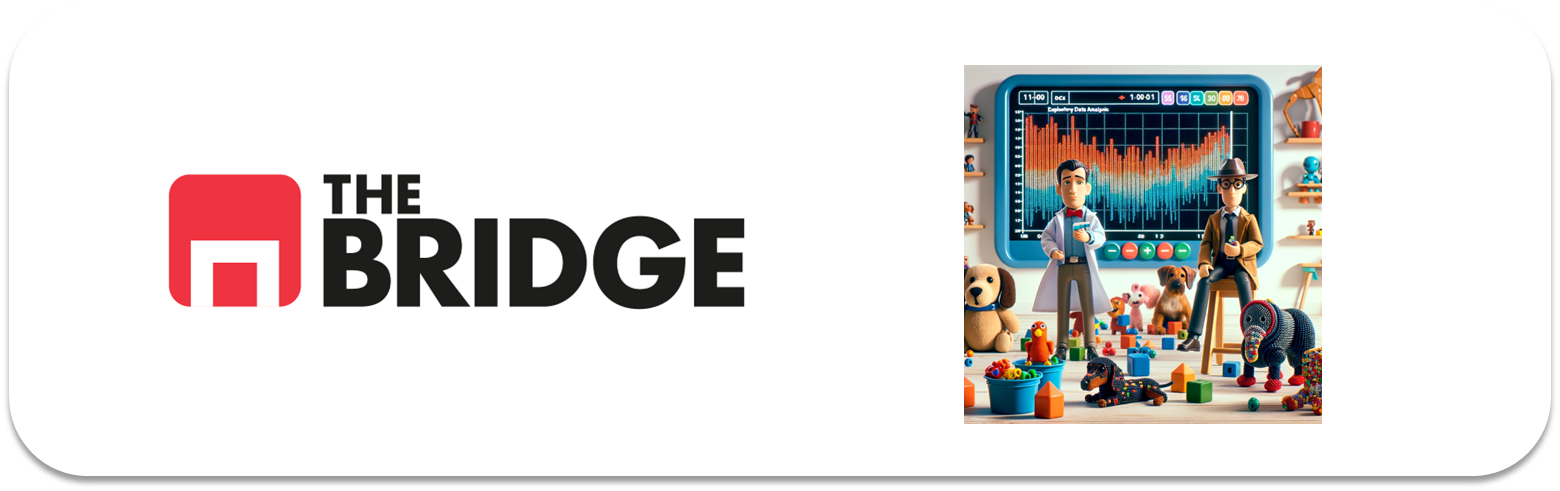

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [34]:
import bootcampviztools as viz
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency #Test Chi-2
from scipy.stats import mannwhitneyu #Prueba U de Man-Whitney
import seaborn as sns

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [35]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [36]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [37]:
df_titanic.drop(columns=["deck", "survived", "pclass", "embarked"], inplace=True)
df_titanic.head(10)

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
5,male,NaN,0,0,8.4583,Third,man,True,Queenstown,no,True
6,male,54.0,0,0,51.8625,First,man,True,Southampton,no,True
7,male,2.0,3,1,21.0750,Third,child,False,Southampton,no,False
8,female,27.0,0,2,11.1333,Third,woman,False,Southampton,yes,False
9,female,14.0,1,0,30.0708,Second,child,False,Cherbourg,yes,False


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [38]:
df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]
df_titanic.drop(columns=["parch", "sibsp"], inplace=True)
df_titanic.head(10)

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
5,male,NaN,8.4583,Third,man,True,Queenstown,no,True,0
6,male,54.0,51.8625,First,man,True,Southampton,no,True,0
7,male,2.0,21.0750,Third,child,False,Southampton,no,False,4
8,female,27.0,11.1333,Third,woman,False,Southampton,yes,False,2
9,female,14.0,30.0708,Second,child,False,Cherbourg,yes,False,1


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [39]:

df_titanic.loc[df_titanic["embark_town"].isna(), "embark_town"] = df_titanic["embark_town"].mode()[0]

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [40]:
#Obtengo las medias de cada valor de "who"
medias = df_titanic.groupby("who")["age"].mean()
medias

who
child     6.369518
man      33.173123
woman    32.000000
Name: age, dtype: float64

In [41]:
#Imputo la media a los nulos para cada valor de "who"
for elemento in df_titanic["who"].unique():
    df_titanic.loc[(df_titanic["age"].isna()) & (df_titanic["who"] == elemento), "age"] = medias[elemento]

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

# Análisis cuestión 1

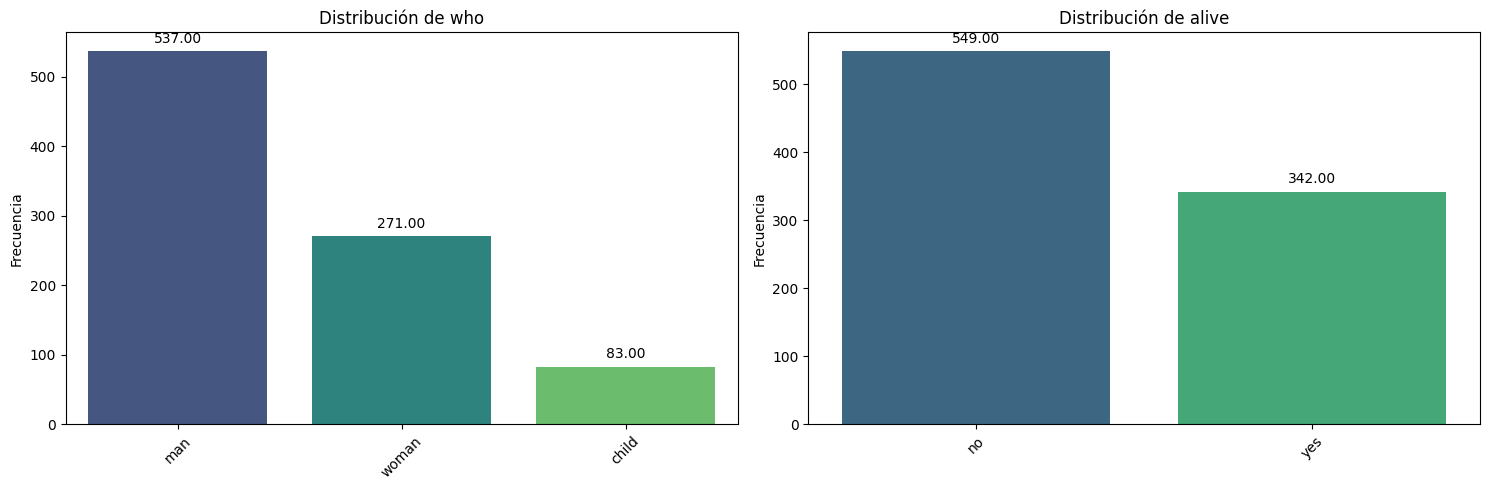

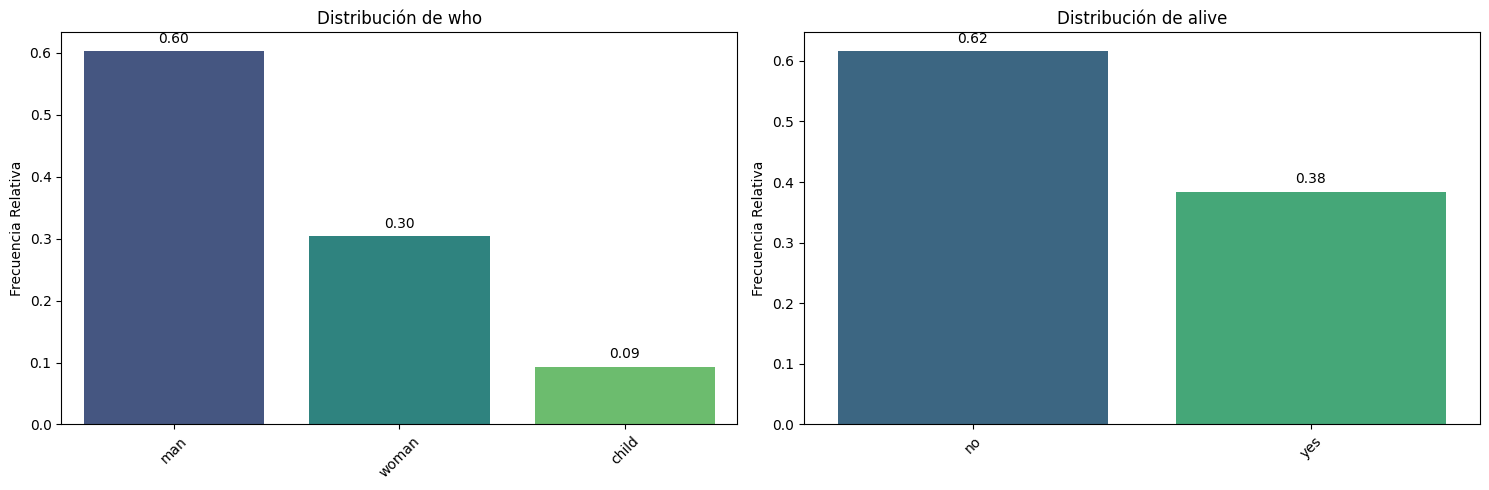

In [42]:
#Visualizo las frecuencias absolutas y relativas de "who" y "alive" para tenerlas de referencia
viz.pinta_distribucion_categoricas(df_titanic,columnas_categoricas=["who","alive"], relativa=False, mostrar_valores=True)
viz.pinta_distribucion_categoricas(df_titanic,columnas_categoricas=["who","alive"], relativa=True, mostrar_valores=True)

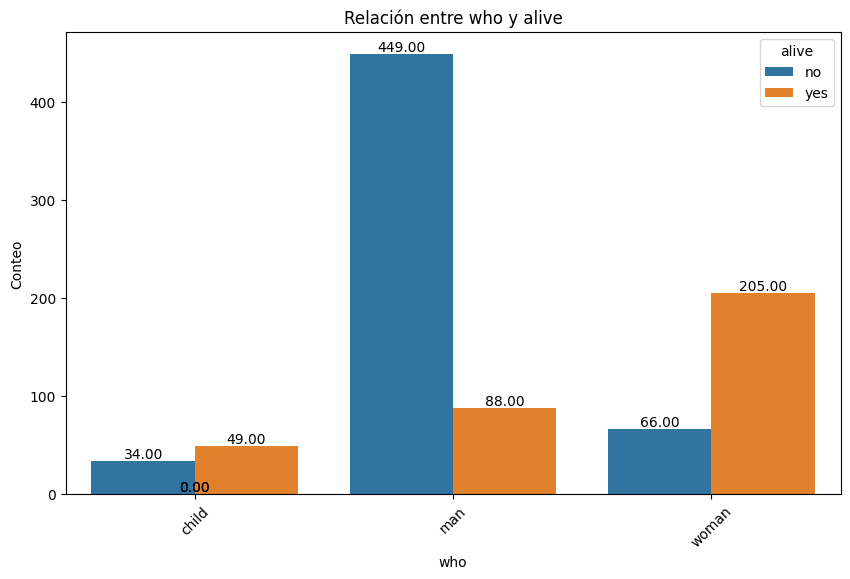

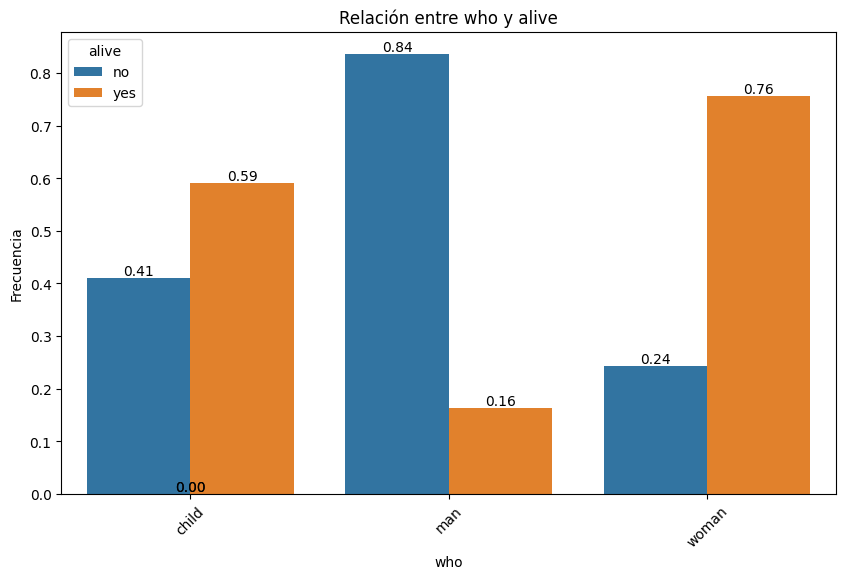

In [43]:
#Visualizo las frecuencias absolutas y relativas de "alive" para cada valor de "who" 
viz.plot_categorical_relationship_fin(df_titanic,cat_col1="who",cat_col2="alive", relative_freq=False,show_values=True)
viz.plot_categorical_relationship_fin(df_titanic,cat_col1="who",cat_col2="alive", relative_freq=True,show_values=True)

En términos absolutos sobrevivieron más mujeres, 205 mujeres, frente a los 88 hombres y 49 niños que también sobrevivieron. En términos relativos también sobrevivieron más mujeres, un 76% de éstas sobrevivieron, frente al 59% de niños y 16% de hombres que también sobrevivieron 

Para analizar la relación entre "alive" y "sex", al tener dos variables categóricas, aplicamos el test Chi-2

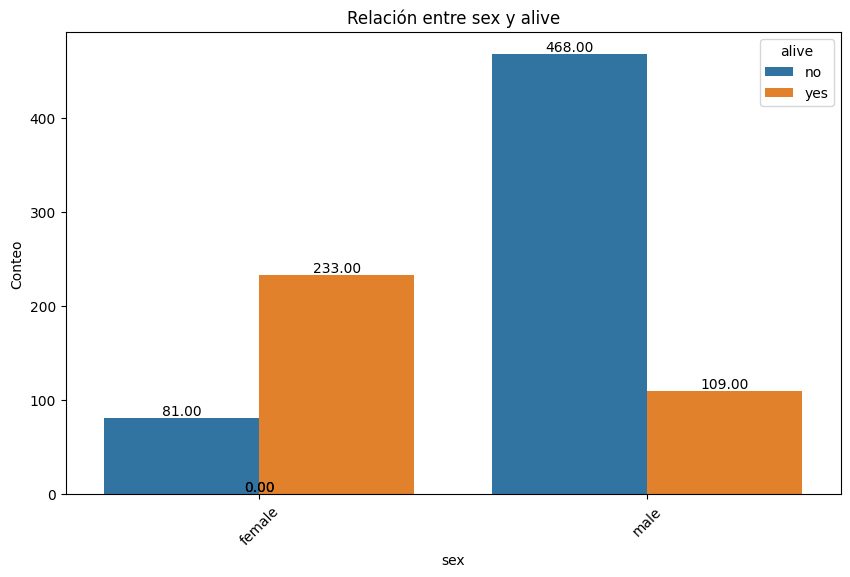

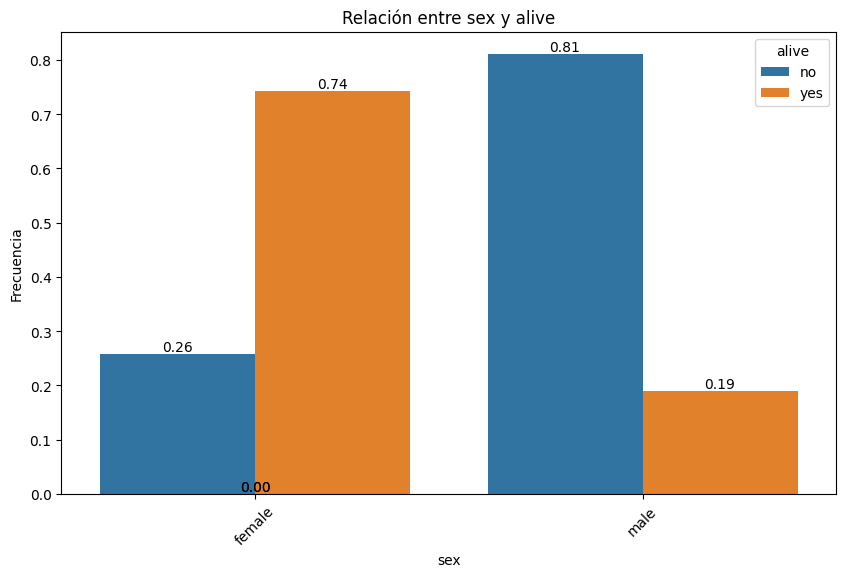

In [97]:
#Visualizo las frecuencias absolutas y relativas de "alive" para cada valor de "sex" 
viz.plot_categorical_relationship_fin(df_titanic,cat_col1="sex",cat_col2="alive", relative_freq=False,show_values=True)
viz.plot_categorical_relationship_fin(df_titanic,cat_col1="sex",cat_col2="alive", relative_freq=True,show_values=True)

In [44]:
#Obtenemos la tabla de contingencia
tabla_contingencia_1_sex = pd.crosstab(df_titanic["alive"], df_titanic["sex"])

tabla_contingencia_1_sex

sex,female,male
alive,,
no,81,468
yes,233,109


In [98]:
#Realizamos la prueba
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_1_sex)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 260.71702016732104
P-Value: 1.1973570627755645e-58
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[193.47474747 355.52525253]
 [120.52525253 221.47474747]]


Obtenemos un p-value muy pequeño (y obviamente menor que 0.05), por lo que podemos descartar la hipótesis nula (la hipotesis nula es que las variables son independientes).

Podemos decir que hay relación entre "sex" y "alive", la tasa de superviviencia es diferente según el sexo, y además es estadísticamente muy significativa. Resultado que es muy evidente si lo visualizamos:

Para analizar la relación entre "alive" y "who", al tener dos variables categóricas, también aplicamos el test Chi-2

In [47]:
#Obtenemos la tabla de contingencia
tabla_contingencia_1_who = pd.crosstab(df_titanic["alive"], df_titanic["who"])

tabla_contingencia_1_who

who,child,man,woman
alive,,,
no,34,449,66
yes,49,88,205


In [99]:
#Realizamos la prueba
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_1_who)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414 330.87878788 166.97979798]
 [ 31.85858586 206.12121212 104.02020202]]


Obtenemos un p-value muy pequeño (y obviamente menor que 0.05), por lo que podemos descartar la hipótesis nula (la hipotesis nula es que las variables son independientes).

Podemos decir que hay relación entre "who" y "alive", la tasa de superviviencia es diferente según si eran hombre, mujer o niño, y además es estadísticamente muy significativa. Resultado que también era muy evidente en el análisis visual previo

# Análisis cuestión 2

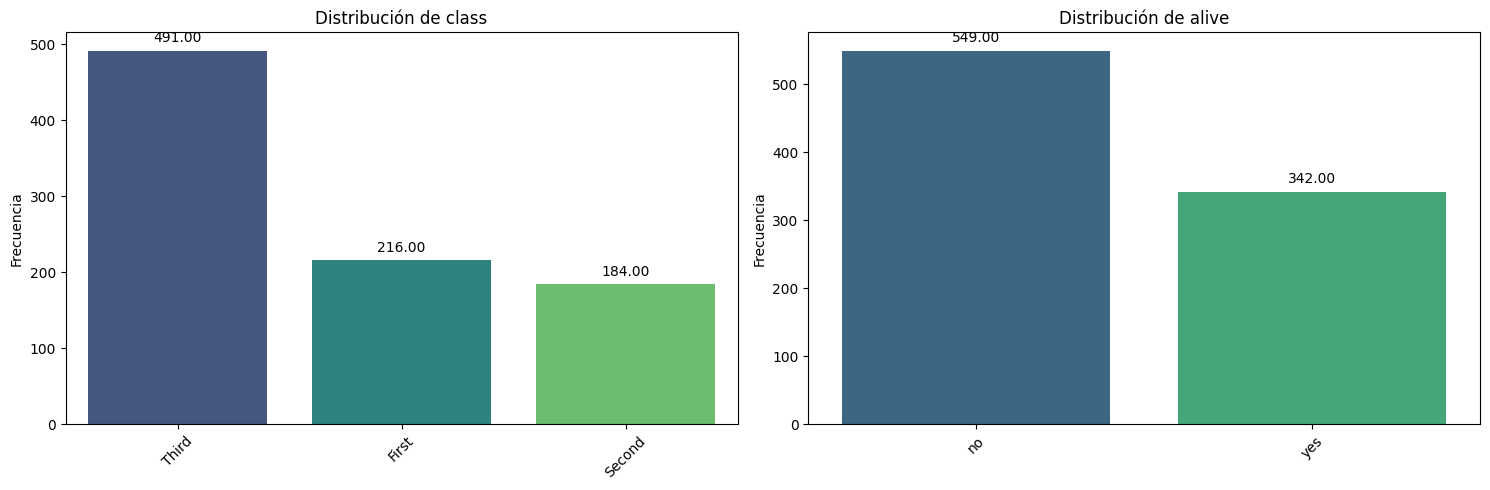

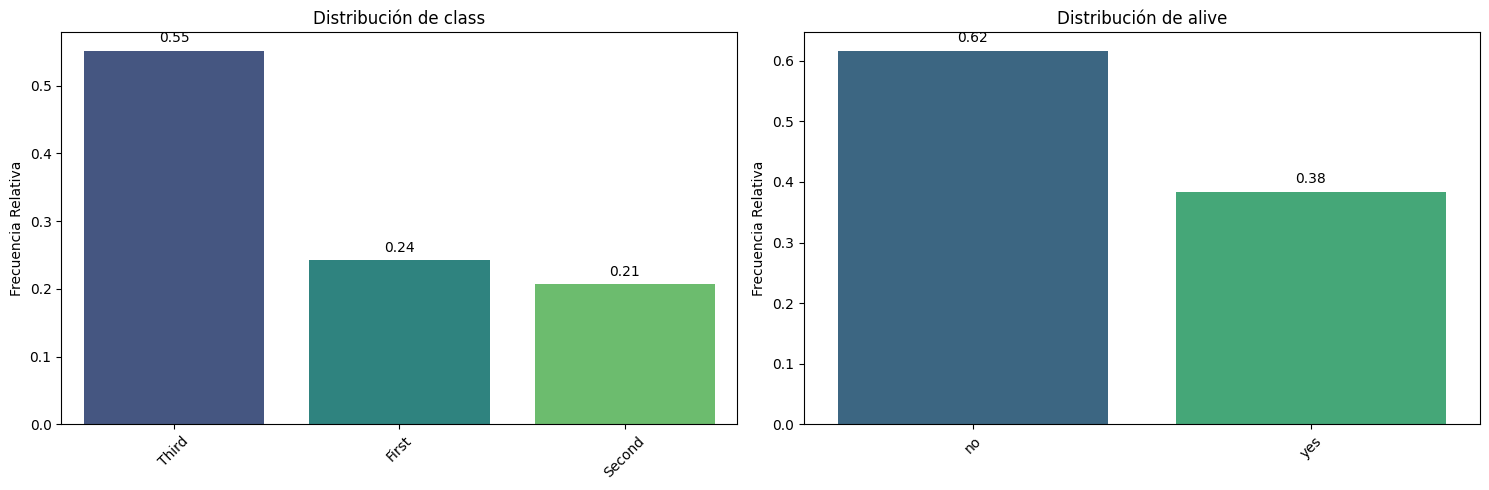

In [49]:
#Visualizo las frecuencias absolutas y relativas de "class" y "alive" para tenerlas de referencia
viz.pinta_distribucion_categoricas(df_titanic,columnas_categoricas=["class","alive"], relativa=False, mostrar_valores=True)
viz.pinta_distribucion_categoricas(df_titanic,columnas_categoricas=["class","alive"], relativa=True, mostrar_valores=True)

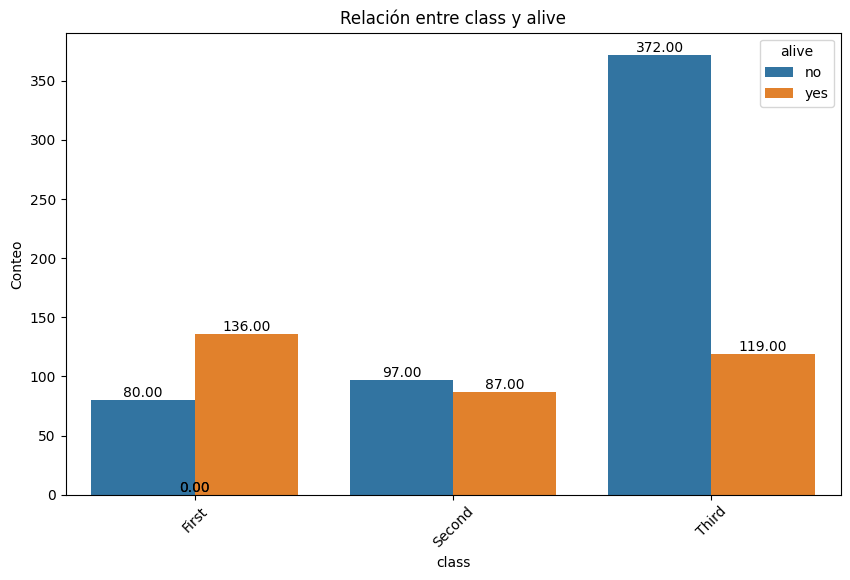

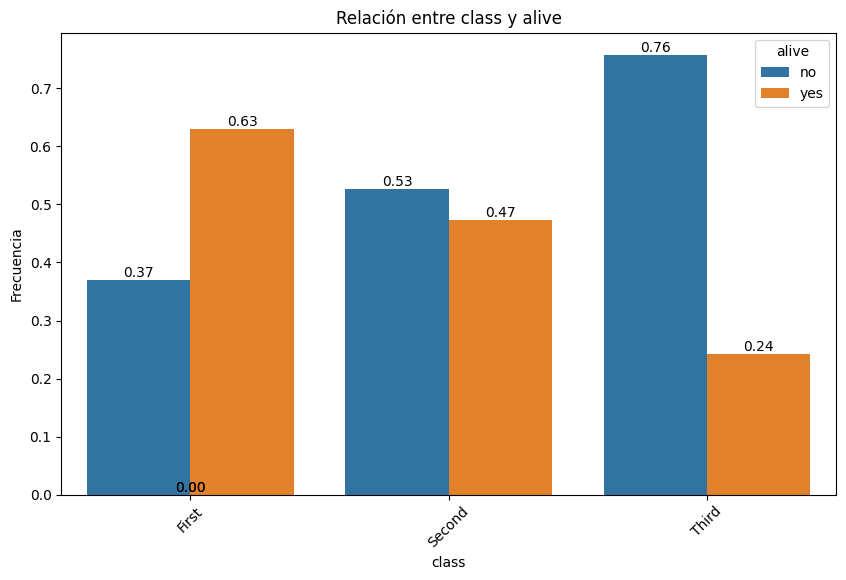

In [100]:
#Visualizo las frecuencias absolutas y relativas de "alive" para cada valor de "class" 
viz.plot_categorical_relationship_fin(df_titanic,cat_col1="class",cat_col2="alive", relative_freq=False,show_values=True)
viz.plot_categorical_relationship_fin(df_titanic,cat_col1="class",cat_col2="alive", relative_freq=True,show_values=True)

En términos absolutos sobrevivieron más pasajeros de primera clase, 136 pasajeros, frente a los 119 pasajeros de tercera clase y los 87 pasajeros de segunda clase que también sobrevivieron. En términos relativos también sobrevivieron más los de primera clase, un 63% de éstos sobrevivieron, frente al 47% de pasajeros de segunda clase y 24% de pasajeros de tercera clase que también sobrevivieron 

Para analizar la relación entre "alive" y "class", al tener dos variables categóricas, aplicamos el test Chi-2

In [102]:
#Obtenemos la tabla de contingencia
tabla_contingencia_1_class = pd.crosstab(df_titanic["alive"], df_titanic["class"])

tabla_contingencia_1_class

class,First,Second,Third
alive,,,
no,80,97,372
yes,136,87,119


In [103]:
#Realizamos la prueba
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_1_class)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


Obtenemos un p-value muy pequeño (y obviamente menor que 0.05), por lo que podemos descartar la hipótesis nula (la hipotesis nula es que las variables son independientes).

Podemos decir que hay relación entre "class" y "alive", la tasa de superviviencia es diferente según la clase en la que viajaron, y además es estadísticamente muy significativa. Resultado que también era muy evidente en el análisis visual previo

# Análisis cuestión 3

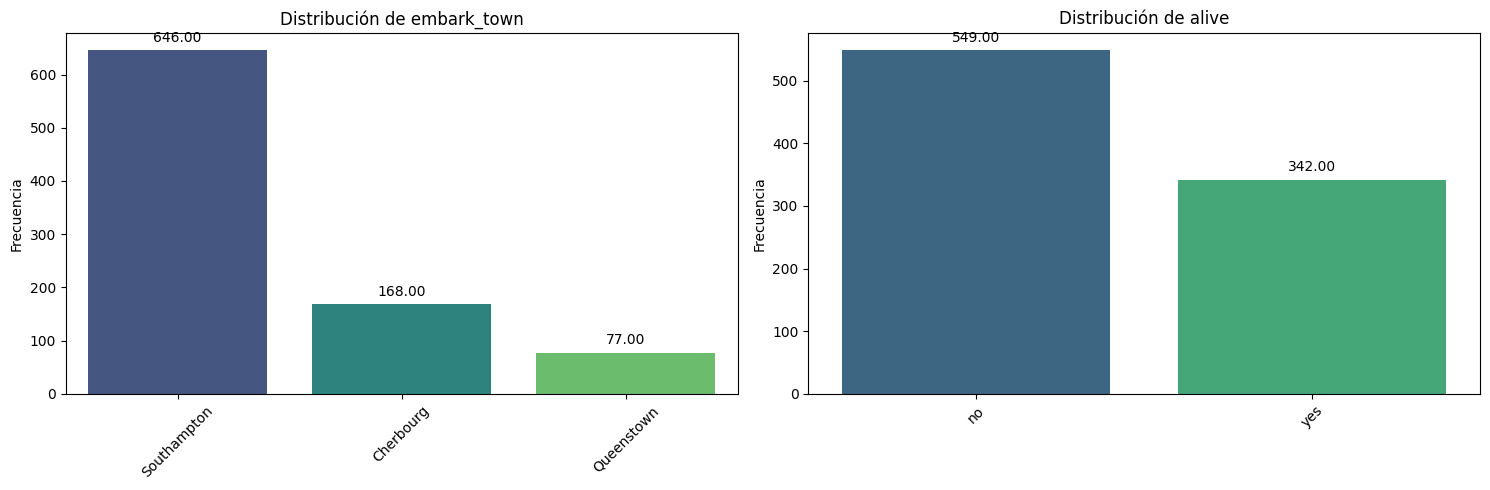

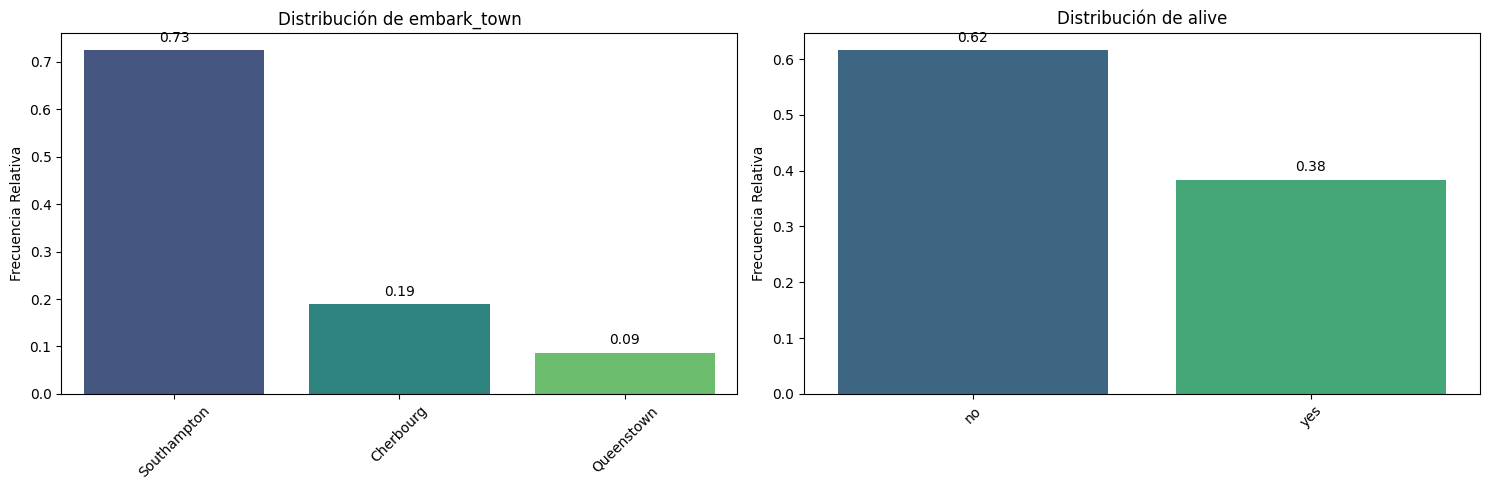

In [53]:
#Visualizo las frecuencias absolutas y relativas de "embark_town" y "alive" para tenerlas de referencia
viz.pinta_distribucion_categoricas(df_titanic,columnas_categoricas=["embark_town","alive"], relativa=False, mostrar_valores=True)
viz.pinta_distribucion_categoricas(df_titanic,columnas_categoricas=["embark_town","alive"], relativa=True, mostrar_valores=True)

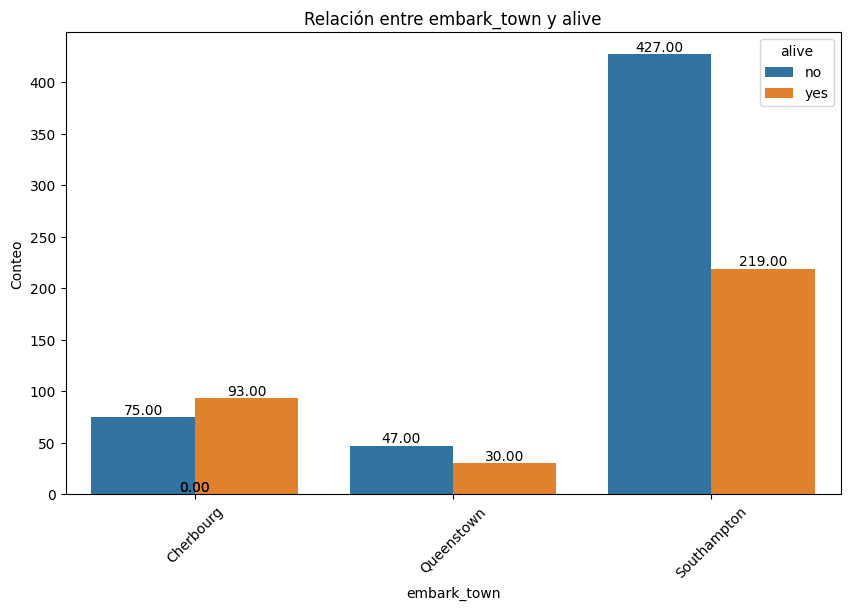

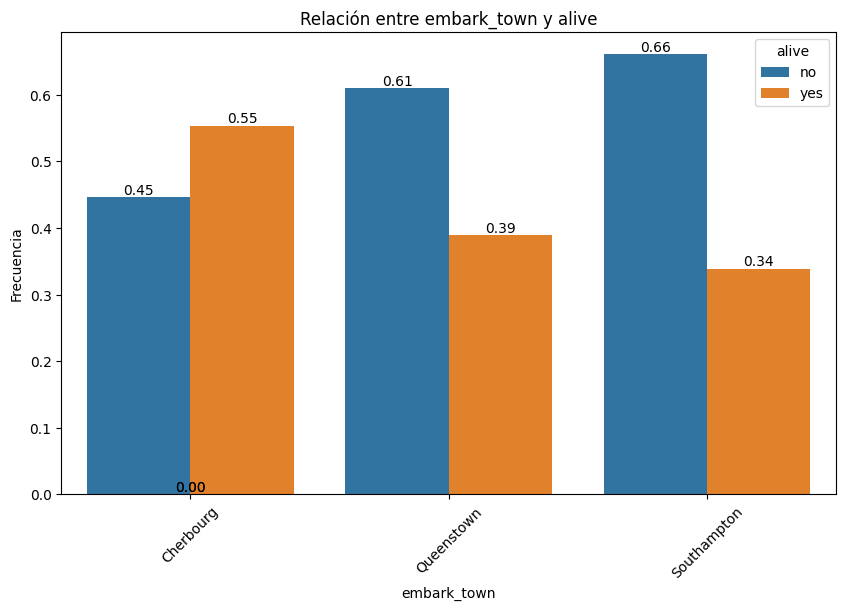

In [104]:
#Visualizo las frecuencias absolutas y relativas de "alive" para cada valor de "embark_town" 
viz.plot_categorical_relationship_fin(df_titanic,cat_col1="embark_town",cat_col2="alive", relative_freq=False,show_values=True)
viz.plot_categorical_relationship_fin(df_titanic,cat_col1="embark_town",cat_col2="alive", relative_freq=True,show_values=True)

En términos absolutos sobrevivieron más personas que embarcaron en Southampton, 219 personas, frente a las 93 personas que embarcaron en Cherbourg y a las 30 personas que embarcaron en Queenstown que también sobrevivieron. En términos relativos, sin embargo, sobrevivieron más las personas que embarcaron en Cherbourg, un 55% de éstos sobrevivieron, frente al 39% de las personas que embarcaron en Queenstown y el 34% de las personas que embarcaron en Southampton que también sobrevivieron 

Para analizar la relación entre "alive" y "embark_town", al tener dos variables categóricas, aplicamos el test Chi-2

In [105]:
#Obtenemos la tabla de contingencia
tabla_contingencia_1_town = pd.crosstab(df_titanic["alive"], df_titanic["embark_town"])

tabla_contingencia_1_town

embark_town,Cherbourg,Queenstown,Southampton
alive,,,
no,75,47,427
yes,93,30,219


In [106]:
#Realizamos la prueba
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_1_town)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  47.44444444 398.04040404]
 [ 64.48484848  29.55555556 247.95959596]]


Obtenemos un p-value muy pequeño (y obviamente menor que 0.05), por lo que podemos descartar la hipótesis nula (la hipotesis nula es que las variables son independientes).

Podemos decir que hay relación entre "embark_town" y "alive", la tasa de superviviencia es diferente según la ciudad en la que embarcaron, y además es estadísticamente muy significativa. Resultado que también era muy evidente en el análisis visual previo

# Análisis cuestión 4

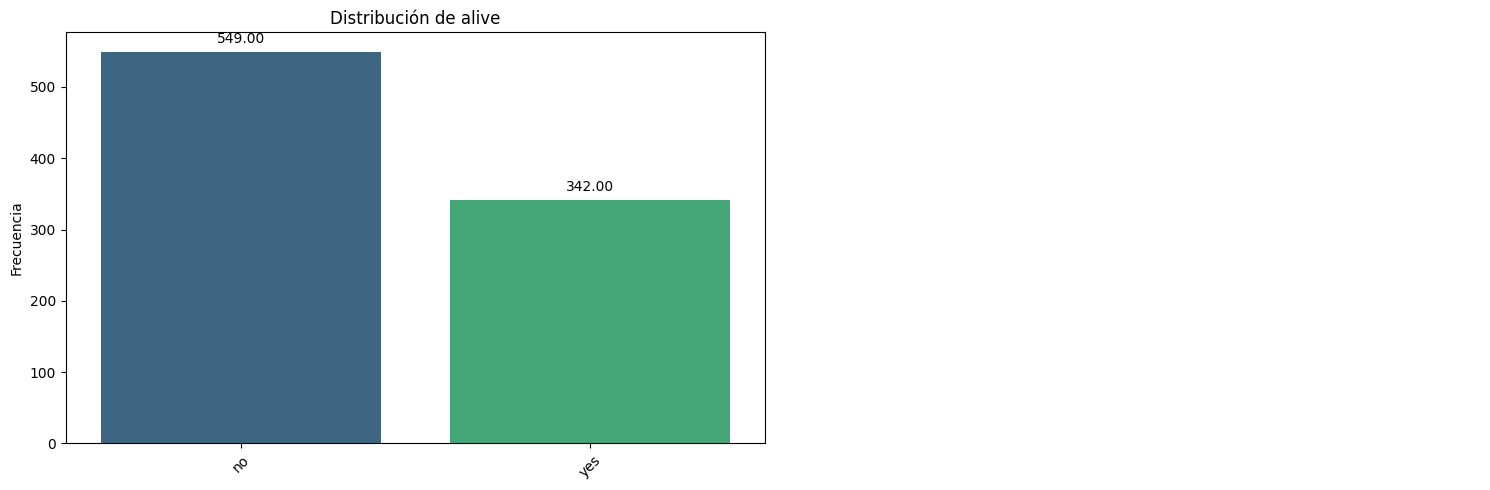

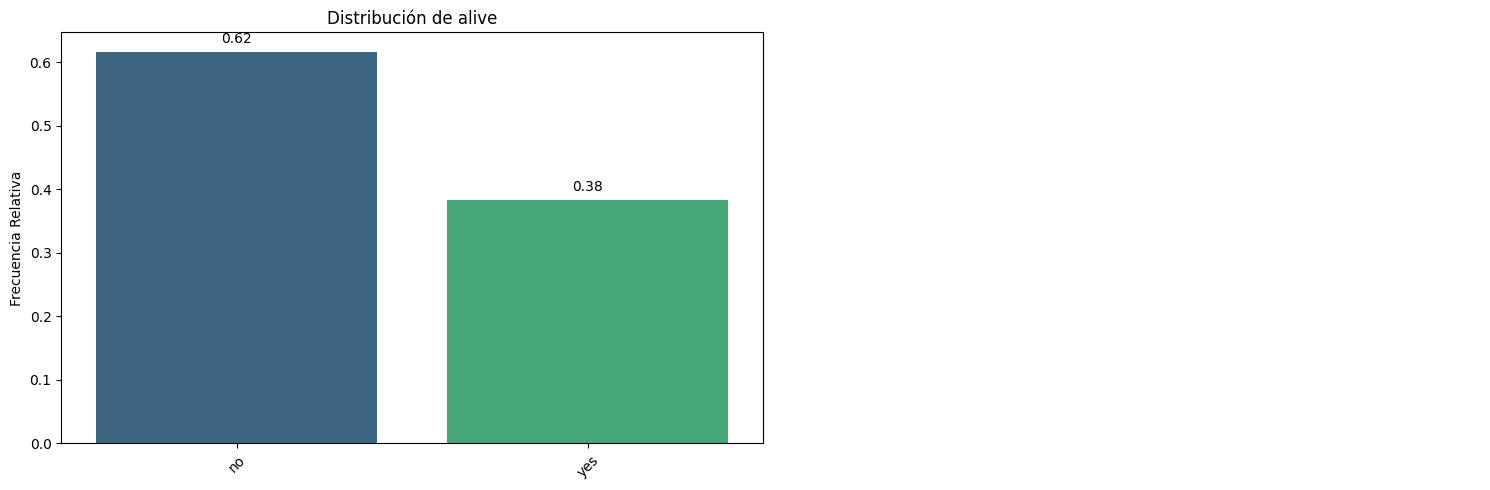

In [57]:
#Visualizo las frecuencias absolutas y relativas de "alive" para tenerlas de referencia
viz.pinta_distribucion_categoricas(df_titanic,columnas_categoricas=["alive"], relativa=False, mostrar_valores=True)
viz.pinta_distribucion_categoricas(df_titanic,columnas_categoricas=["alive"], relativa=True, mostrar_valores=True)

(2,)


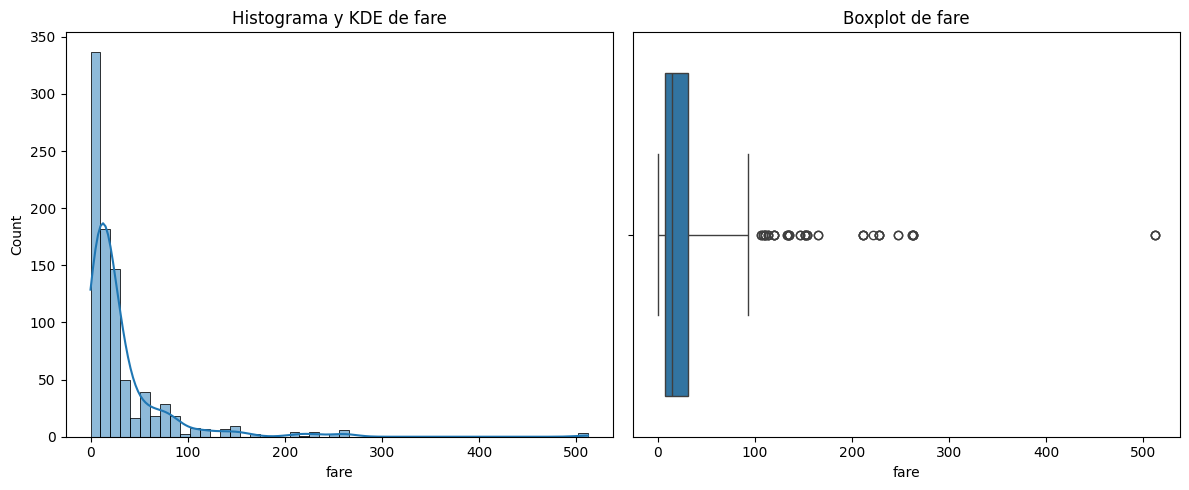

In [58]:
#Visualizo el histograma, la funcion de distribución y diagrama de caja de "fare" para tenerlo de referencia
viz.plot_combined_graphs(df_titanic,columns=["fare"],whisker_width=3, bins=50)

In [107]:
#Obtengo las medidas numericas de la variable "fare" para cada valor de la variable "alive"
df_titanic.groupby("alive")["fare"].describe()

,count,mean,std,min,25%,50%,75%,max
alive,,,,,,,,
no,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
yes,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


In [109]:
#Calculo el Coeficiente de Variacion de "fare" para cada valor de la variable "alive"
for valor in df_titanic["alive"].unique():
    cv = (df_titanic.loc[df_titanic["alive"] == valor,"fare"].describe().T["std"]/df_titanic.loc[df_titanic["alive"] == valor, "fare"].describe().T["mean"])*100
    cv = round(cv,2)
    print(f"El Coeficiente de Variación de <fare> para {valor} es {cv}%")

El Coeficiente de Variación de <fare> para no es 141.91%
El Coeficiente de Variación de <fare> para yes es 137.61%


La variable "fare" es muy dispersa para ambos valores de "alive" por lo que tomo la mediana

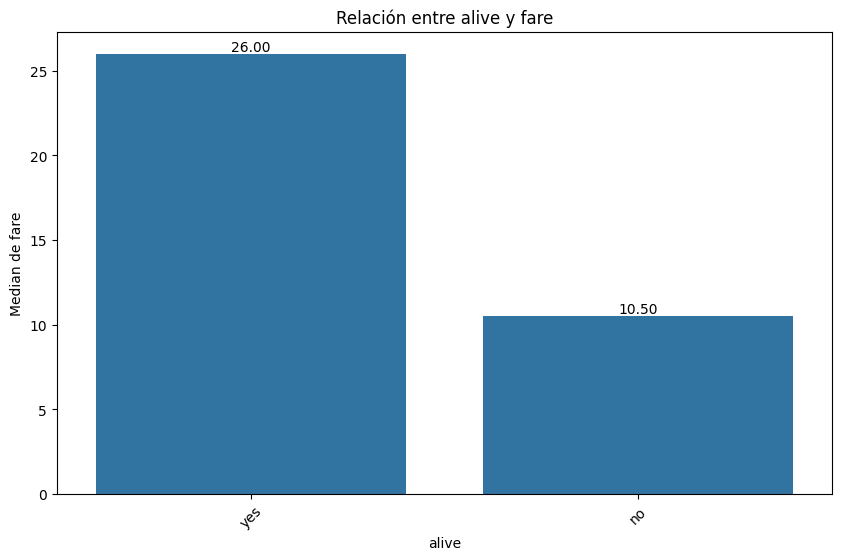

In [61]:
#Comparo la mediana de "fare" para cada valor de "alive"
viz.plot_categorical_numerical_relationship(df_titanic,categorical_col="alive",numerical_col="fare", show_values=True, measure="median")

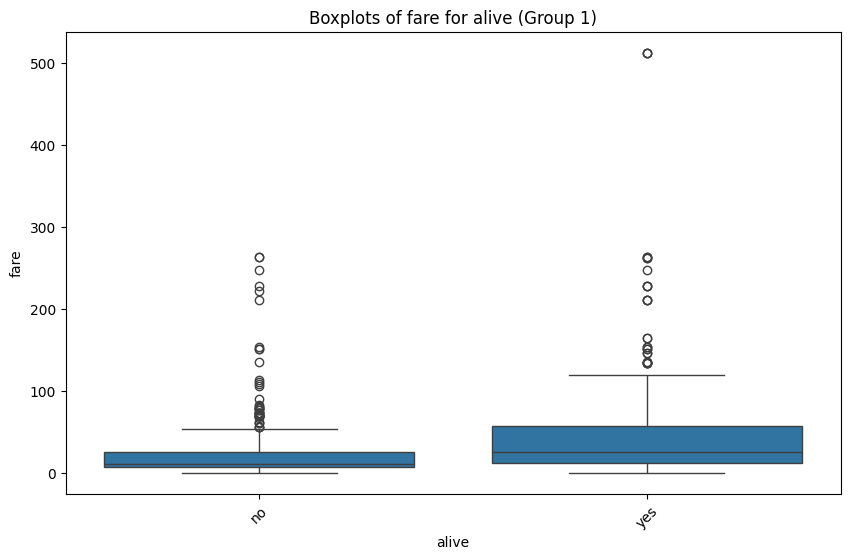

In [62]:
#Comparo los diagramas de caja para cada valor de "alive"
viz.plot_grouped_boxplots(df_titanic,cat_col="alive", num_col="fare", group_size=2)

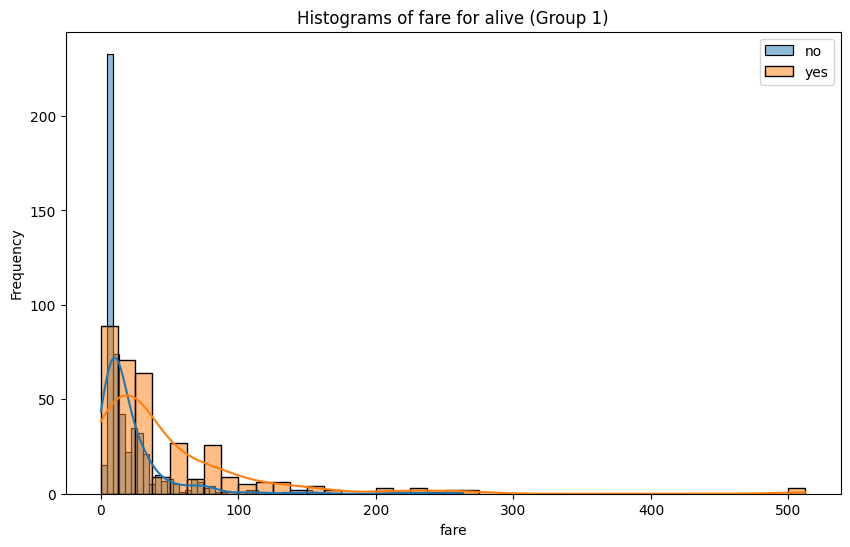

In [63]:
#Comparo los histogramas para cada valor de "alive"
viz.plot_grouped_histograms(df_titanic, cat_col="alive", num_col="fare",group_size=2)

Analizando visualmente los números y las gráficas se intuye una relación entre las variables "alive" y "fare", ya que los diagramas de caja, histogramas y comparativa de medianas difieren para cada valor de "alive"

Para analizar la relación entre "alive" y "fare", al tener una variable categórica y otra numérica (que no sigue una distribución normal), aplicamos la prueba U de Mann-Withney

In [110]:
#Separamos los datos en dos grupos segun la variable categorica
grupo_a = df_titanic.loc[df_titanic["alive"] == "yes","fare"]
grupo_b = df_titanic.loc[df_titanic["alive"] == "no","fare"]

In [111]:
#Aplicamos la prueba
u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 129951.5
Valor p: 4.553477179250237e-22


Obtenemos un p-value muy pequeño (y obviamente menor que 0.05), por lo que podemos descartar la hipótesis nula (la hipotesis nula es que no hay diferencia estadísticamente significativa entre las medianas de los valores).

Podemos decir que hay relación entre "fare" y "alive", la tasa de superviviencia es diferente según el precio del billete que pagaron, y además es estadísticamente muy significativa. Resultado que también era muy evidente en el análisis visual previo

# Análisis cuestión 5

In [113]:
#Obtenemos los datos de los pasajeros que no pagaron billete
df_titanic[df_titanic["fare"] == 0]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
179,male,36.000000,0.0,Third,man,True,Southampton,no,True,0
263,male,40.000000,0.0,First,man,True,Southampton,no,True,0
271,male,25.000000,0.0,Third,man,True,Southampton,yes,True,0
277,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
302,male,19.000000,0.0,Third,man,True,Southampton,no,True,0
413,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
466,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
481,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
597,male,49.000000,0.0,Third,man,True,Southampton,no,True,0
633,male,33.173123,0.0,First,man,True,Southampton,no,True,0


Los datos hacen pensar que esos pasajeros eran la tripulación del barco por estos motivos:
1. Todos son hombres
2. Viajaban en las distintas clases para dar servicio en cada una de ellas
3. Todos embarcaron en Southampton (ciudad de salida del Titanic)
4. No iban acompañados por familiares
5. Casi todos murieron (seguramente intentando ayudar a los pasajeros)

In [114]:
#Obtenemos la persona que más dinero pagó
df_titanic.iloc[[df_titanic["fare"].idxmax()]]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0


Era una mujer de 35 años que viajaba en primera clase, sola y que embarcó en Cherbourg. Sobrevivió al accidente

# Análisis cuestión 6

In [115]:
#Realizo el analisis bivariante que me queda con las variables "embark_town" y "fare"
df_titanic.groupby("embark_town")["fare"].describe()

,count,mean,std,min,25%,50%,75%,max
embark_town,,,,,,,,
Cherbourg,168.0,59.954144,83.912994,4.0125,13.69795,29.70,78.500025,512.3292
Queenstown,77.0,13.276030,14.188047,6.7500,7.75000,7.75,15.500000,90.0000
Southampton,646.0,27.243651,35.952905,0.0000,8.05000,13.00,27.900000,263.0000


In [117]:
#Calculo el Coeficiente de Variacion de "fare" para cada valor de la variable "embark_town"
for valor in df_titanic["embark_town"].unique():
    cv = (df_titanic.loc[df_titanic["embark_town"] == valor,"fare"].describe().T["std"]/df_titanic.loc[df_titanic["embark_town"] == valor, "fare"].describe().T["mean"])*100
    cv = round(cv,2)
    print(f"El Coeficiente de Variación de <embark_town> para {valor} es {cv}%")

El Coeficiente de Variación de <embark_town> para Southampton es 131.97%
El Coeficiente de Variación de <embark_town> para Cherbourg es 139.96%
El Coeficiente de Variación de <embark_town> para Queenstown es 106.87%


La variable "fare" es muy dispersa para los tres valores de "embark_town" por lo que tomo la mediana

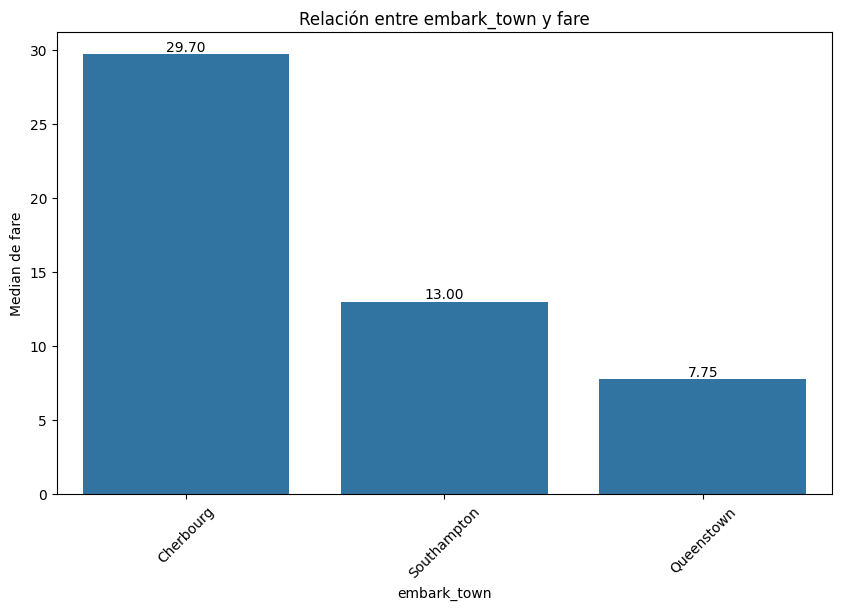

In [70]:
#Comparo la mediana de "fare" para cada valor de "embark_town"
viz.plot_categorical_numerical_relationship(df_titanic,categorical_col="embark_town",numerical_col="fare", show_values=True, measure="median")

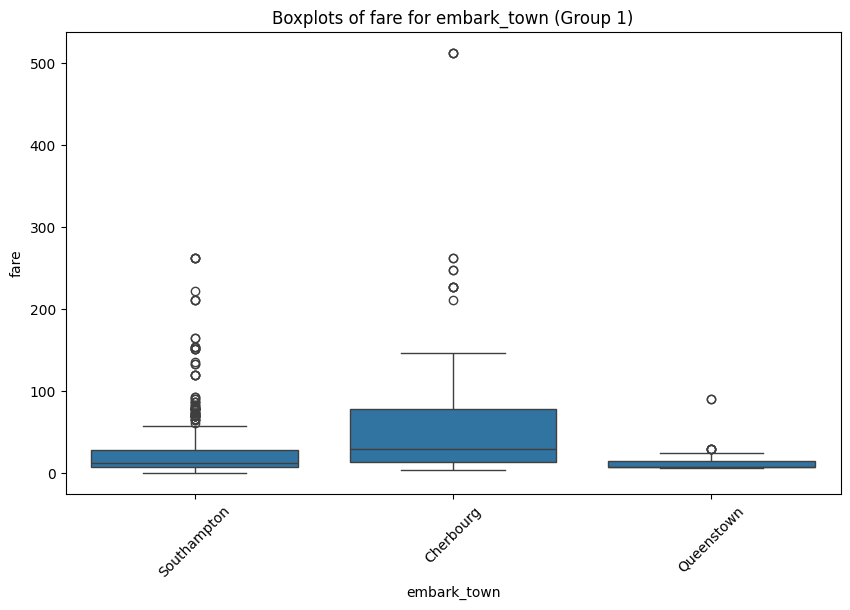

In [71]:
#Comparo los diagramas de caja para cada valor de "embark_town"
viz.plot_grouped_boxplots(df_titanic,cat_col="embark_town", num_col="fare", group_size=3)

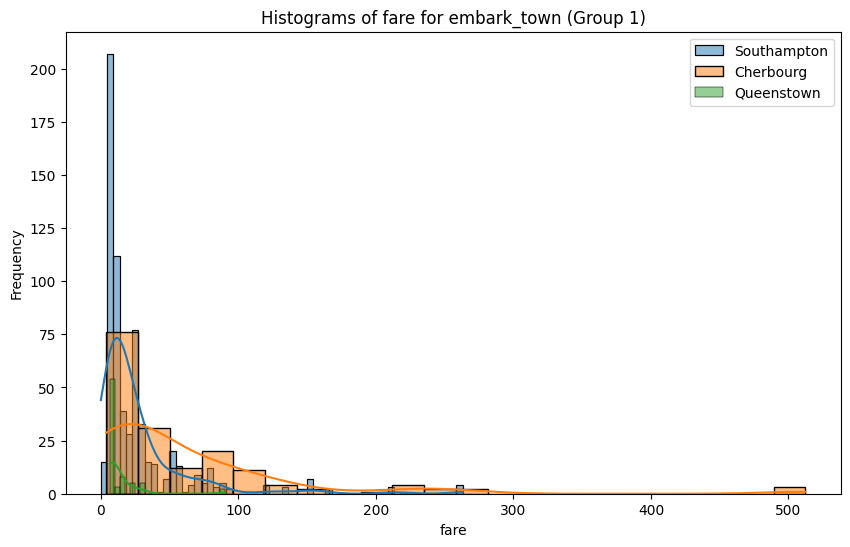

In [72]:
#Comparo los histogramas para cada valor de "embark_town"
viz.plot_grouped_histograms(df_titanic, cat_col="embark_town", num_col="fare",group_size=3)

Analizando visualmente los números y las gráficas se intuye una relación entre las variables "embark_town" y "fare", ya que los diagramas de caja, histogramas y comparativa de medianas difieren para cada valor de "embark_town"

Vamos ahora con el análisis multivariante. Tomamos como variable directora "embark_town" y realizaremos el análisis bivariante "alive" y "fare" para cada valor de "embark_town"

In [120]:
#Realizo la division de DataFrames para cada valor de la columna directora
col_directora = "embark_town"
col_1 = "fare"
col_2 = "alive"

diccionario_multivariante = {}

for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor, [col_1,col_2]]

Valor de <embark_town>: Southampton


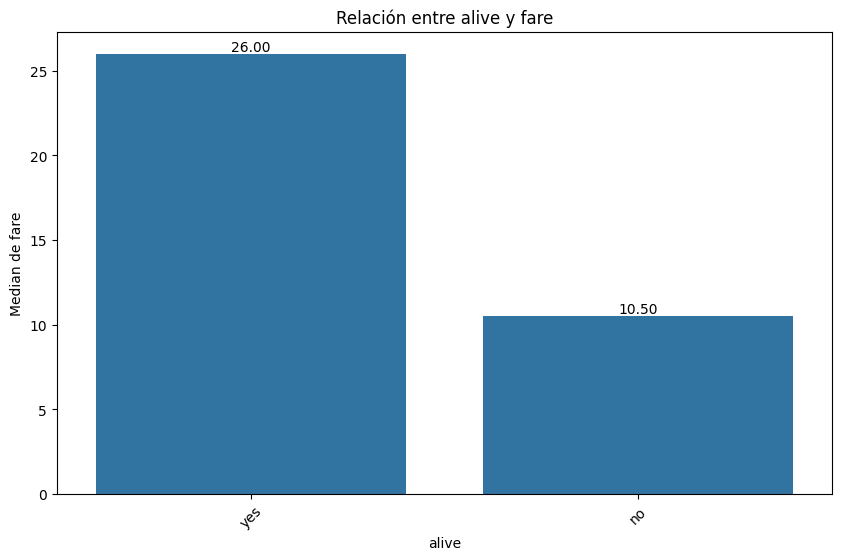

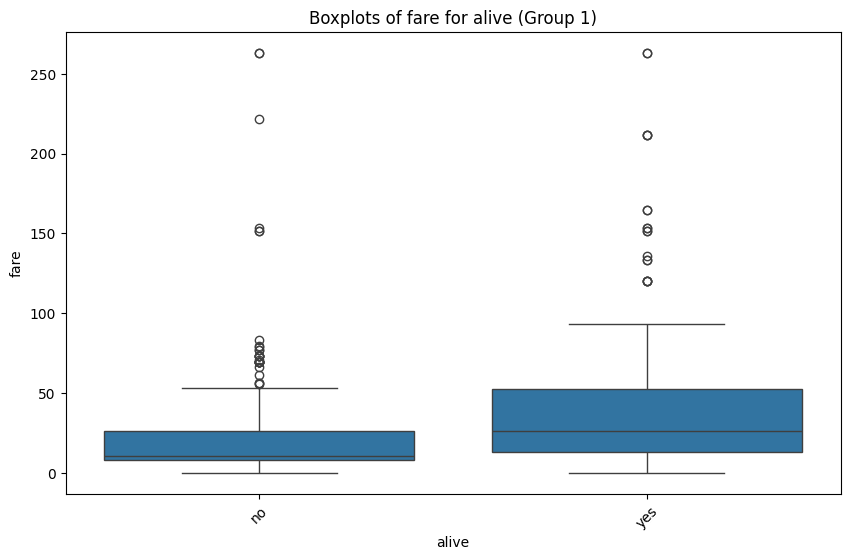

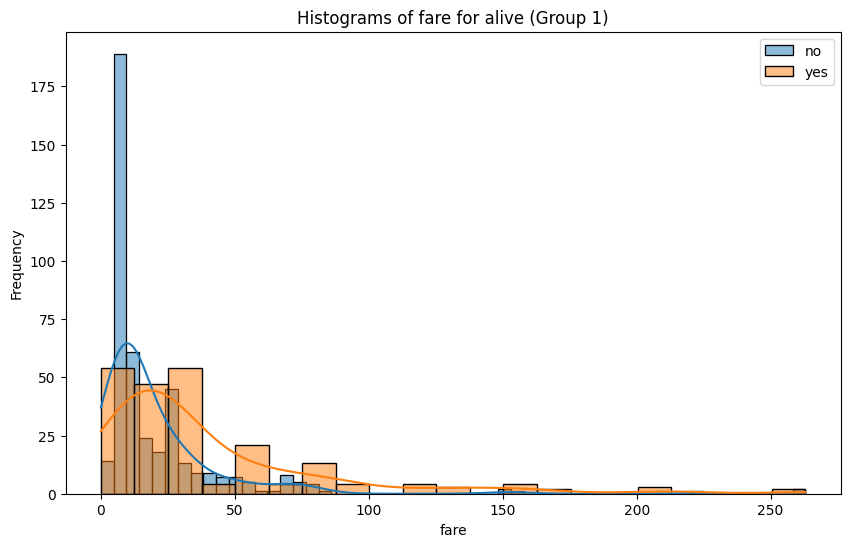

Valor de <embark_town>: Cherbourg


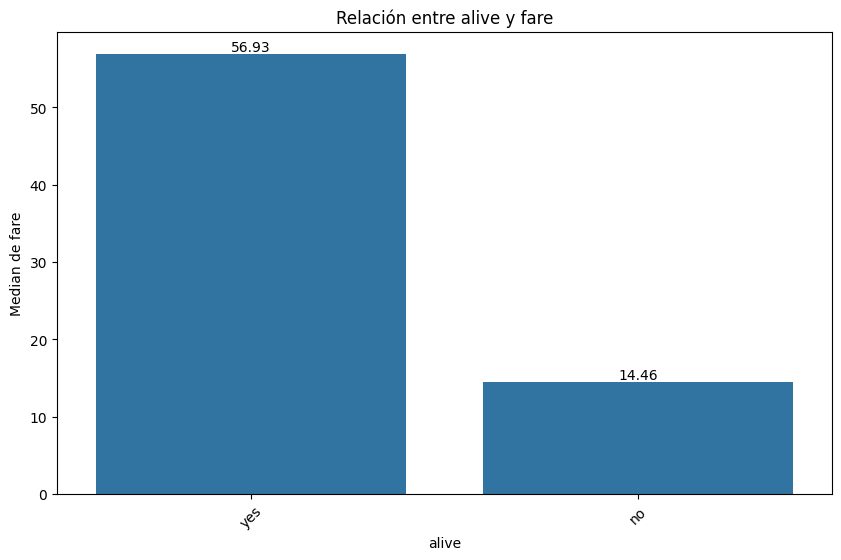

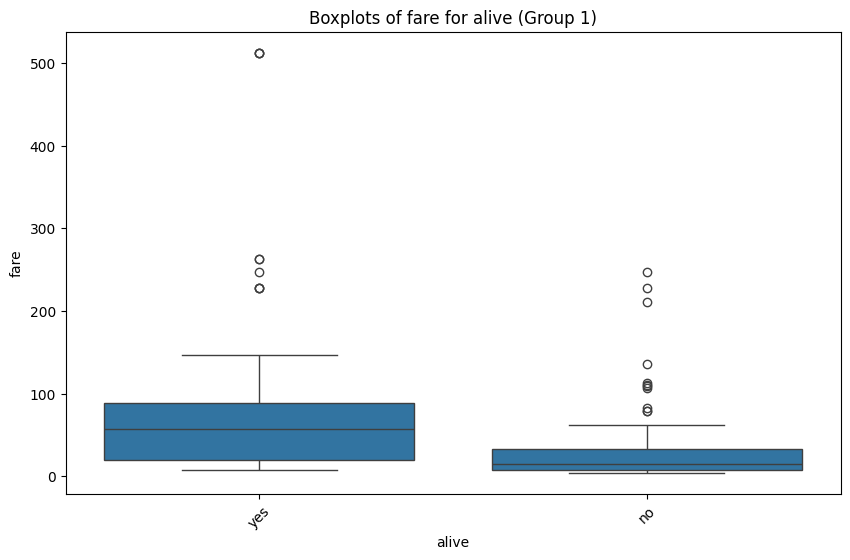

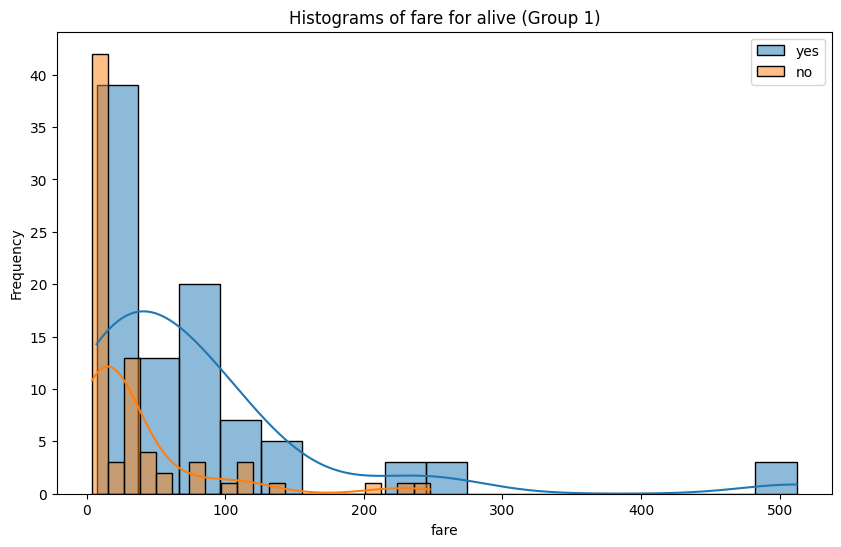

Valor de <embark_town>: Queenstown


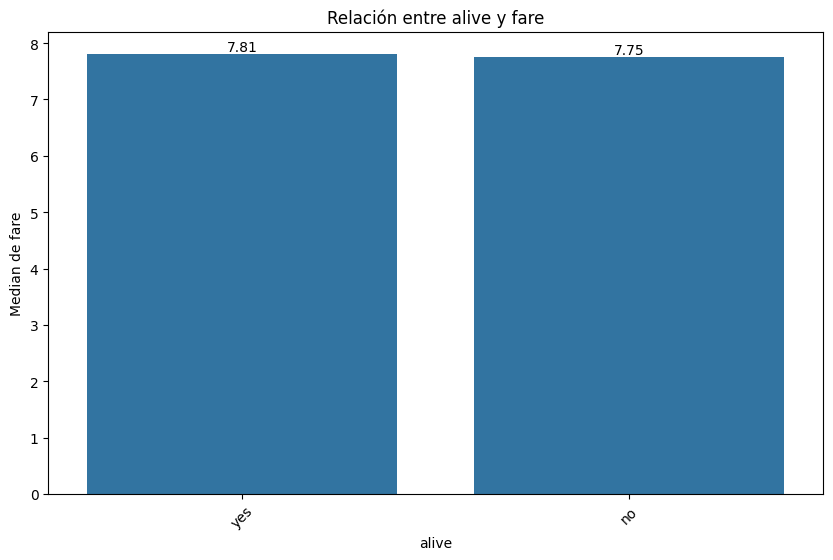

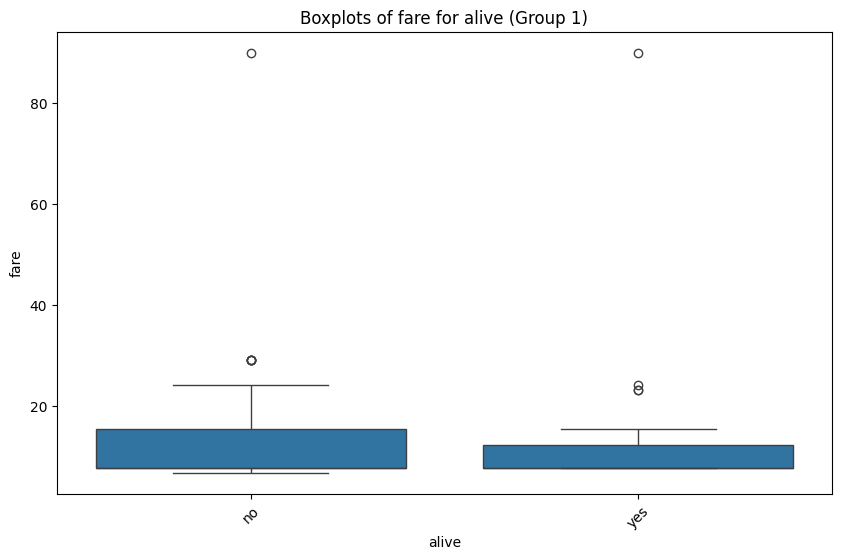

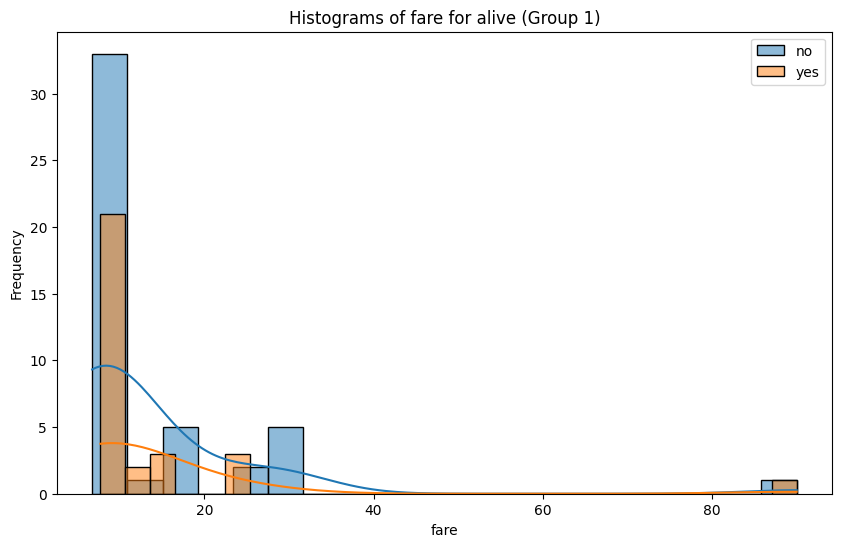

In [121]:
#Realizo el analisis bivariante para cada valor de la columna directora
for valor, df_datos in diccionario_multivariante.items():
    print(f"Valor de <{col_directora}>:", valor)

    # Comparo la mediana de "fare" para cada valor de "alive"
    viz.plot_categorical_numerical_relationship(df_datos,categorical_col="alive",numerical_col="fare", show_values=True, measure="median")

    #Comparo los diagramas de caja para cada valor de "alive"
    viz.plot_grouped_boxplots(df_datos,cat_col="alive", num_col="fare", group_size=2)

    #Comparo los histogramas para cada valor de "alive"
    viz.plot_grouped_histograms(df_datos, cat_col="alive", num_col="fare",group_size=2)

No hay similitud entre las ciudades de embarque para los tres gráficos analizados (comparativa de medianas, histograma y diagrama de cajas), por lo que existe relación entre las variables "embark_town", "alive" y "fare"

# Análisis cuestión 7 

(2,)


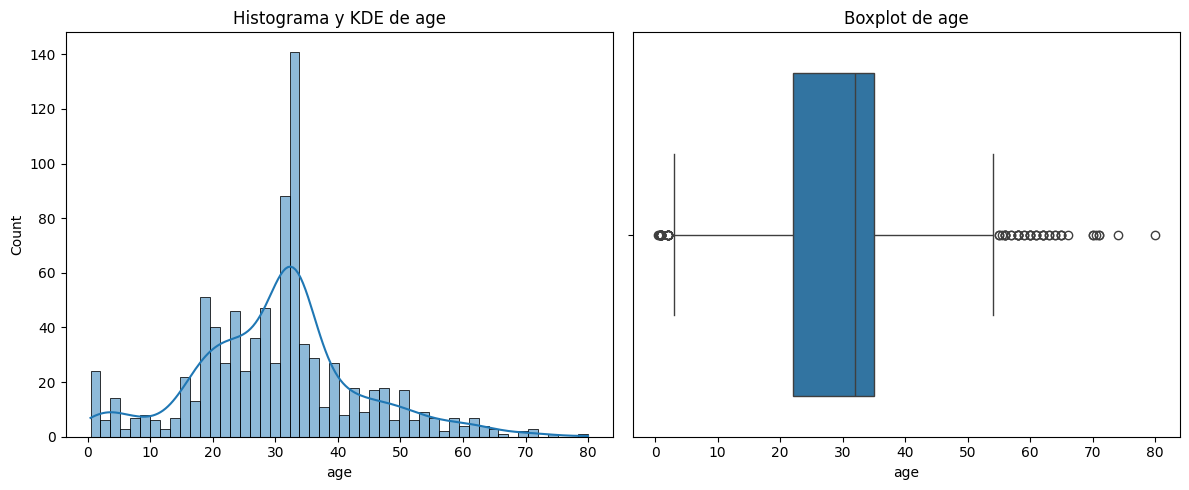

In [138]:
#Visualizo el histograma, la funcion de distribución y diagrama de caja de "age" para tenerlo de referencia
viz.plot_combined_graphs(df_titanic,columns=["age"],whisker_width=1.5, bins=50)

Observando en el histograma de "age" establezco tres grupos de edad:
1. Grupo 1: rango entre 0 y 20
2. Grupo 2: rango entre 20 y 50
3. Grupo 3: rango superior a 50

In [144]:
#Creo la funcion para clasificar las edades
def clasificador_edades(edad):

    if edad <= 20:
        grupo = "Grupo 1"
        return grupo

    elif edad <= 50:
        grupo = "Grupo 2"
        return grupo
    
    else:
        grupo  = "Grupo 3"
        return grupo

In [145]:
#Creo una columna nueva con la clasificacion de edades
df_titanic["grupo_edad"] = df_titanic["age"].apply(clasificador_edades)
df_titanic.head(10)

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,grupo_edad
0,male,22.000000,7.2500,Third,man,True,Southampton,no,False,1,Grupo 2
1,female,38.000000,71.2833,First,woman,False,Cherbourg,yes,False,1,Grupo 2
2,female,26.000000,7.9250,Third,woman,False,Southampton,yes,True,0,Grupo 2
3,female,35.000000,53.1000,First,woman,False,Southampton,yes,False,1,Grupo 2
4,male,35.000000,8.0500,Third,man,True,Southampton,no,True,0,Grupo 2
5,male,33.173123,8.4583,Third,man,True,Queenstown,no,True,0,Grupo 2
6,male,54.000000,51.8625,First,man,True,Southampton,no,True,0,Grupo 3
7,male,2.000000,21.0750,Third,child,False,Southampton,no,False,4,Grupo 1
8,female,27.000000,11.1333,Third,woman,False,Southampton,yes,False,2,Grupo 2
9,female,14.000000,30.0708,Second,child,False,Cherbourg,yes,False,1,Grupo 1


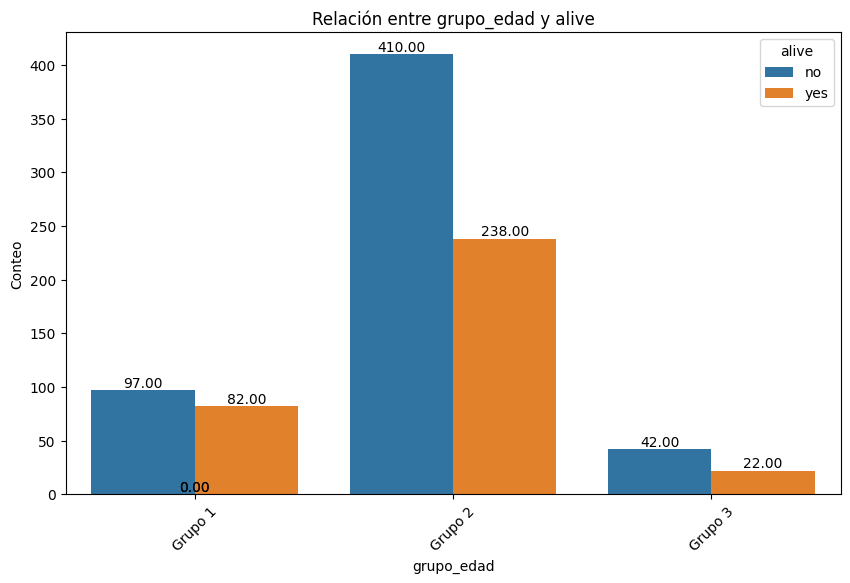

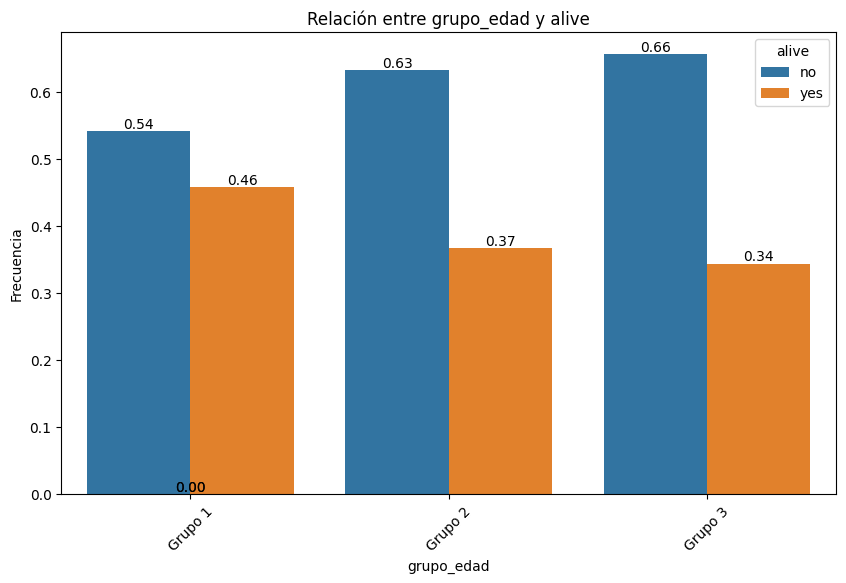

In [142]:
#Visualizo las frecuencias absolutas y relativas de "alive" para cada valor de "grupo_edad" 
viz.plot_categorical_relationship_fin(df_titanic,cat_col1="grupo_edad",cat_col2="alive", relative_freq=False,show_values=True)
viz.plot_categorical_relationship_fin(df_titanic,cat_col1="grupo_edad",cat_col2="alive", relative_freq=True,show_values=True)

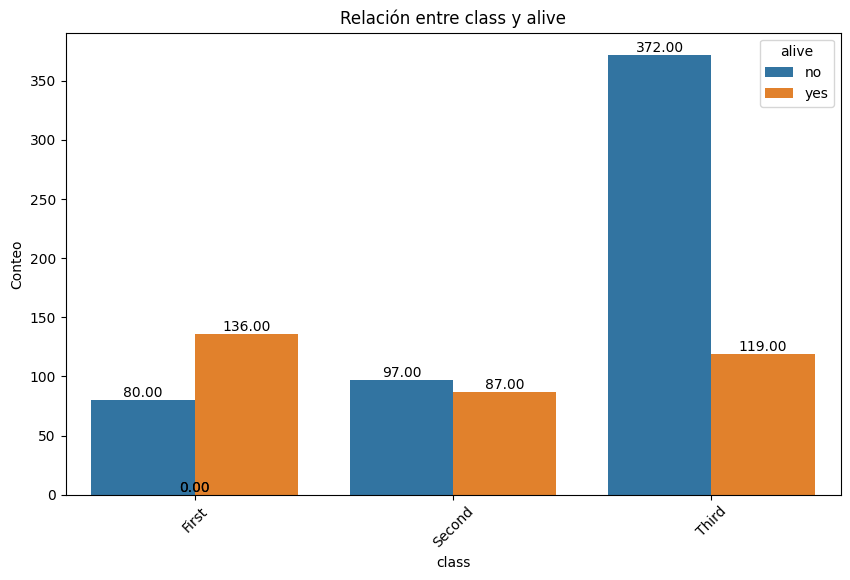

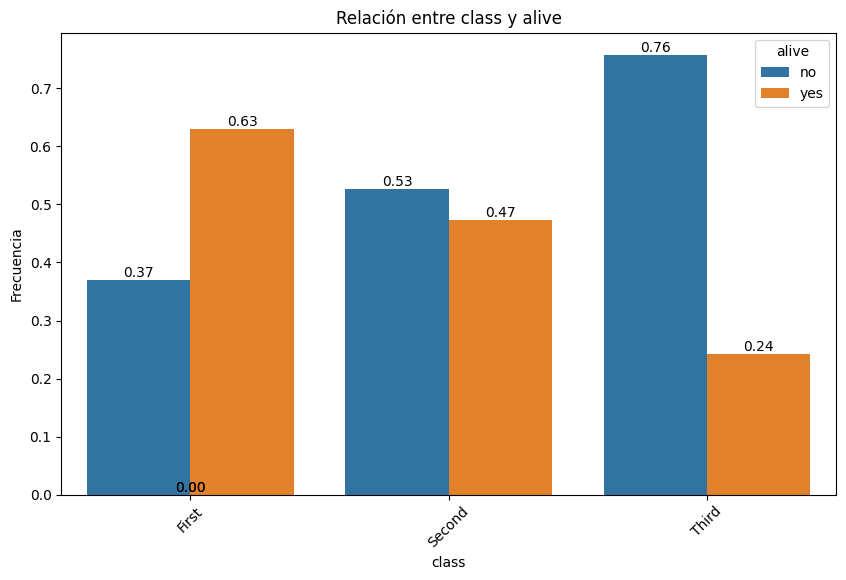

In [143]:
#Visualizo las frecuencias absolutas y relativas de "alive" para cada valor de "class" 
viz.plot_categorical_relationship_fin(df_titanic,cat_col1="class",cat_col2="alive", relative_freq=False,show_values=True)
viz.plot_categorical_relationship_fin(df_titanic,cat_col1="class",cat_col2="alive", relative_freq=True,show_values=True)

Variable "grupo edad":
* En término absolutos sobrevivieron más personas del grupo 2, 238 personas, frente a las 82 personas del grupo 1 y a las 22 personas del grupo 3 que también sobrevivieron
* Sin embargo, en términos relativos sobrevivieron más las personas del grupo 1, un 46% de éstos sobrevivieron, frente al 37% de las personas del grupo 2 y el 34% de las personas del grupo 3 que también sobrevivieron

Variable "class":
* En término absolutos sobrevivieron más personas de primera clase, 136 personas, frente a las 119 personas de tercera clase y a las 87 personas de segunda clase que también sobrevivieron
* En términos relativos también sobrevivieron más las personas de primera clase, un 63% de éstos sobrevivieron, frente al 47% de las personas de segunda clase y el 24% de las personas de tercera clase que también sobrevivieron


# Análisis cuestión 8

Realizamos el analisis multivariante tomando como variable directora "alive"

In [122]:
#Realizo la division de DataFrames para cada valor de la columna directora
col_directora = "alive"
col_1 = "age"
col_2 = "fare"

diccionario_multivariante = {}

for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor, [col_1,col_2]]

Valor de <alive>: no
           age      fare
age   1.000000  0.062993
fare  0.062993  1.000000 



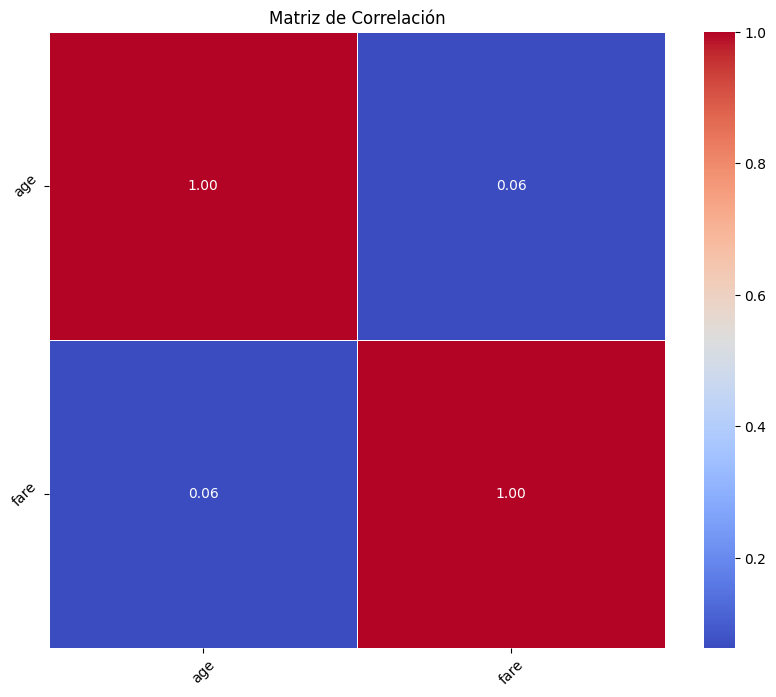

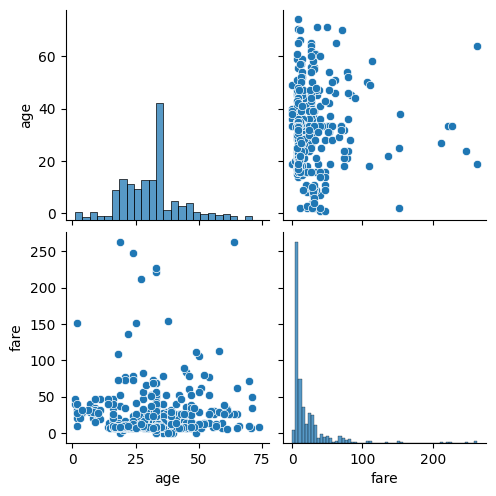

Valor de <alive>: yes
           age      fare
age   1.000000  0.144418
fare  0.144418  1.000000 



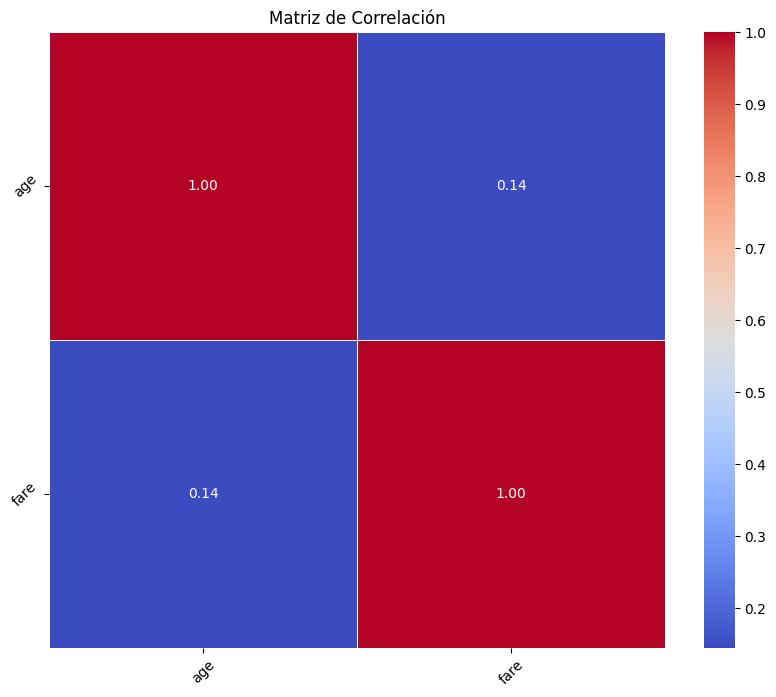

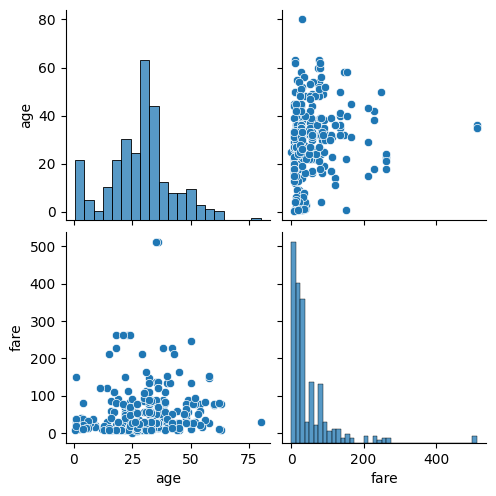

In [123]:
#Realizo el analisis bivariante para cada valor de la columna directora
for valor, df_datos in diccionario_multivariante.items():
    print(f"Valor de <{col_directora}>:", valor)

    #Calculo la matriz de correlacion
    corr_matrix = df_datos[["age","fare"]].corr()
    print(corr_matrix,"\n")

    #Muestro el Heatmap
    plt.figure(figsize=(10, 8))  #Para ajustar el tamaño de las gráficas
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
                cbar=True, square=True, linewidths=.5) #El cmap es el rango de colores usado para representar "el calor"

    plt.title('Matriz de Correlación')
    plt.xticks(rotation=45)  #Rota las etiquetas de las x si es necesario
    plt.yticks(rotation=45)  #Rota las etiquetas de las y si es necesario

    plt.show()

    #Muestro el Pairplot
    df_datos_filtrado = df_datos[["age","fare"]]
    sns.pairplot(df_datos_filtrado)
    plt.show()


Para ambos valores de la variable "alive" el coeficiente de correlación lineal entre las variables "age" y "fare" es muy cercano al 0, por lo que podemos intuir que no existe relación lineal entre "age" y "fare" ni para los que sobrevivieron ni para los que fallecieron

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [78]:
df_viajes_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")
df_viajes_jun.head(10)

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23
5,MoldaviAir,Cádiz,Melbourne,20029,Boeing 737,True,53148.153240,1721,728045.68,Mol_CaMe_10737,Jun23
6,MoldaviAir,París,Londres,344,Airbus A320,False,915.246400,44,13805.52,Mol_PaLo_11320,Jun23
7,PamPangea,París,Melbourne,16925,Airbus A380,True,217722.658400,1328,1056735.47,Pam_PaMe_11380,Jun23
8,PamPangea,Nueva York,Bali,16589,Boeing 737,True,45277.618464,1459,600836.96,Pam_NuBa_10737,Jun23
9,Airnar,Ginebra,Cádiz,1725,Airbus A380,False,20339.820000,135,110108.07,Air_GiCa_11380,Jun23


In [79]:
df_viajes_jun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   aircompany  600 non-null    object 
 1   origen      600 non-null    object 
 2   destino     600 non-null    object 
 3   distancia   600 non-null    int64  
 4   avion       600 non-null    object 
 5   con_escala  600 non-null    bool   
 6   consumo_kg  600 non-null    float64
 7   duracion    600 non-null    int64  
 8   ingresos    600 non-null    float64
 9   id_vuelo    600 non-null    object 
 10  mes         600 non-null    object 
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 47.6+ KB


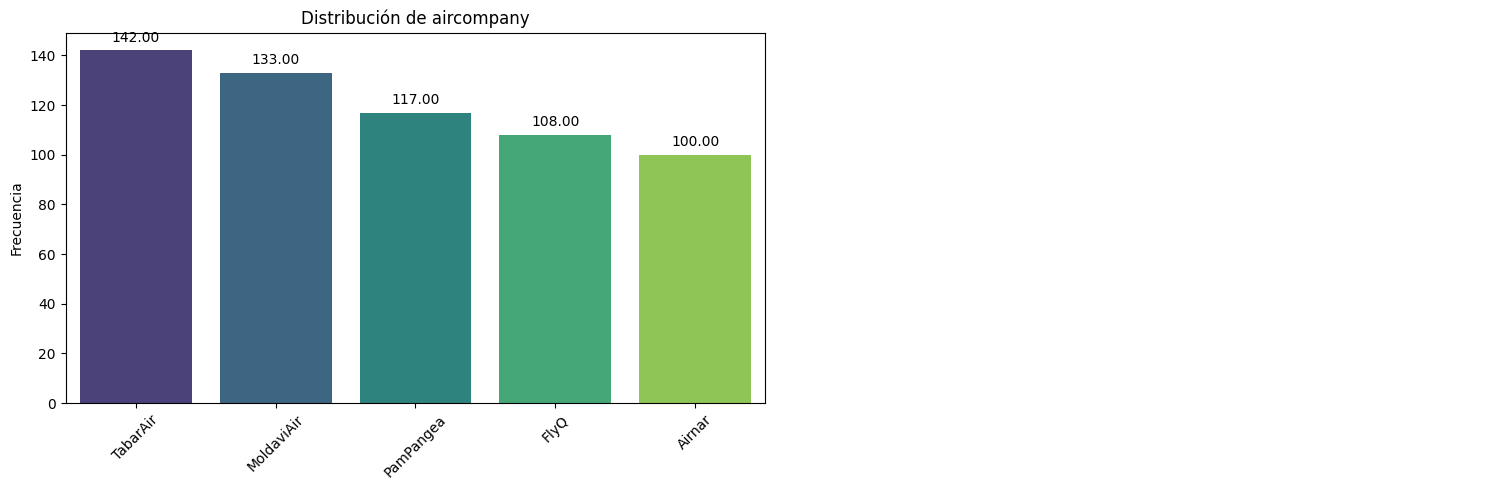

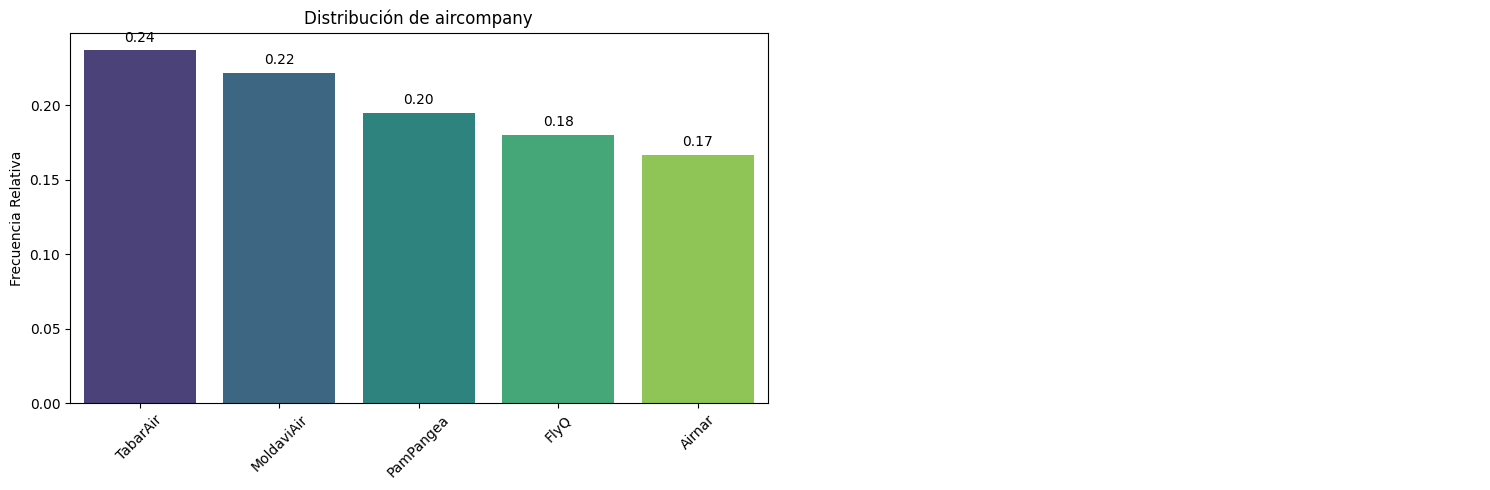

In [80]:
#Visualizo las frecuencias absolutas y relativas de "aircompany" para tenerlas de referencia
viz.pinta_distribucion_categoricas(df_viajes_jun,columnas_categoricas=["aircompany"], relativa=False, mostrar_valores=True)
viz.pinta_distribucion_categoricas(df_viajes_jun,columnas_categoricas=["aircompany"], relativa=True, mostrar_valores=True)

(2,)


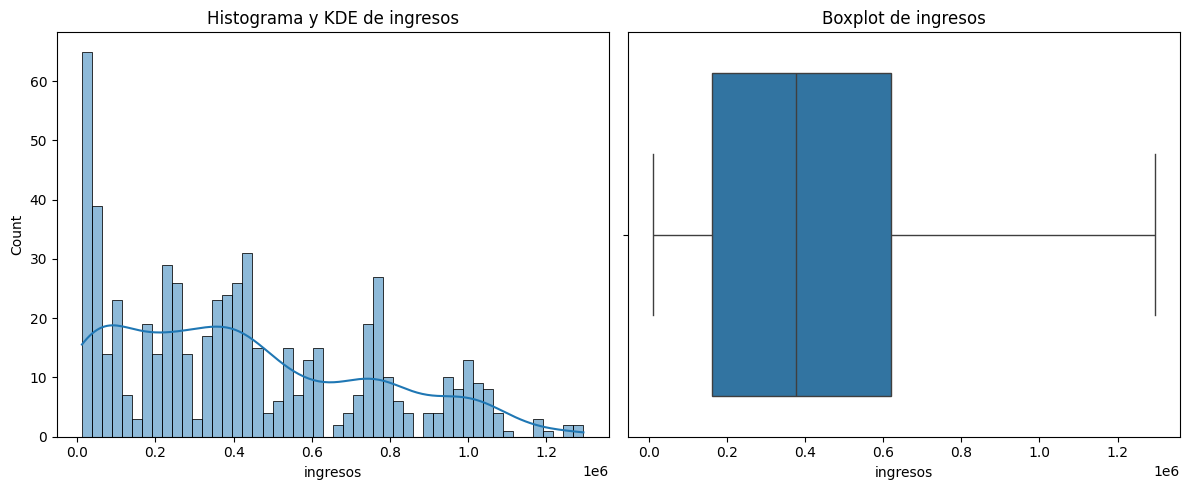

In [81]:
#Visualizo el histograma, la funcion de distribución y diagrama de caja de "ingresos" para tenerlo de referencia
viz.plot_combined_graphs(df_viajes_jun,columns=["ingresos"],whisker_width=1.5, bins=50)

In [125]:
#Obtengo las medidas numericas de la variable "ingresos" para cada valor de la variable "aircompany"
df_viajes_jun.groupby("aircompany")["ingresos"].describe()

,count,mean,std,min,25%,50%,75%,max
aircompany,,,,,,,,
Airnar,100.0,405293.978200,269583.848420,14232.65,185270.6000,396764.220,608356.1225,958617.02
FlyQ,108.0,401619.008056,295633.712828,23498.34,237556.9525,366970.685,473901.4325,1081702.91
MoldaviAir,133.0,548077.209098,374577.838426,11797.85,178872.9000,532426.220,794055.4100,1295515.83
PamPangea,117.0,478417.048718,364458.092328,12383.21,163124.5300,442668.520,763079.0200,1083591.01
TabarAir,142.0,271042.230282,177006.035877,24289.53,95620.5075,258379.745,398147.1925,623089.41


In [127]:
#Calculo el Coeficiente de Variacion de "ingresos" para cada valor de la variable "aircompany"
for valor in df_viajes_jun["aircompany"].unique():
    cv = (df_viajes_jun.loc[df_viajes_jun["aircompany"] == valor,"ingresos"].describe().T["std"]/df_viajes_jun.loc[df_viajes_jun["aircompany"] == valor, "ingresos"].describe().T["mean"])*100
    cv = round(cv,2)
    print(f"El Coeficiente de Variación de <ingresos> para {valor} es {cv}%")

El Coeficiente de Variación de <ingresos> para Airnar es 66.52%
El Coeficiente de Variación de <ingresos> para FlyQ es 73.61%
El Coeficiente de Variación de <ingresos> para TabarAir es 65.31%
El Coeficiente de Variación de <ingresos> para MoldaviAir es 68.34%
El Coeficiente de Variación de <ingresos> para PamPangea es 76.18%


La variable "ingresos" es muy dispersa para todos los valores de "aircompany" por lo que tomo la mediana

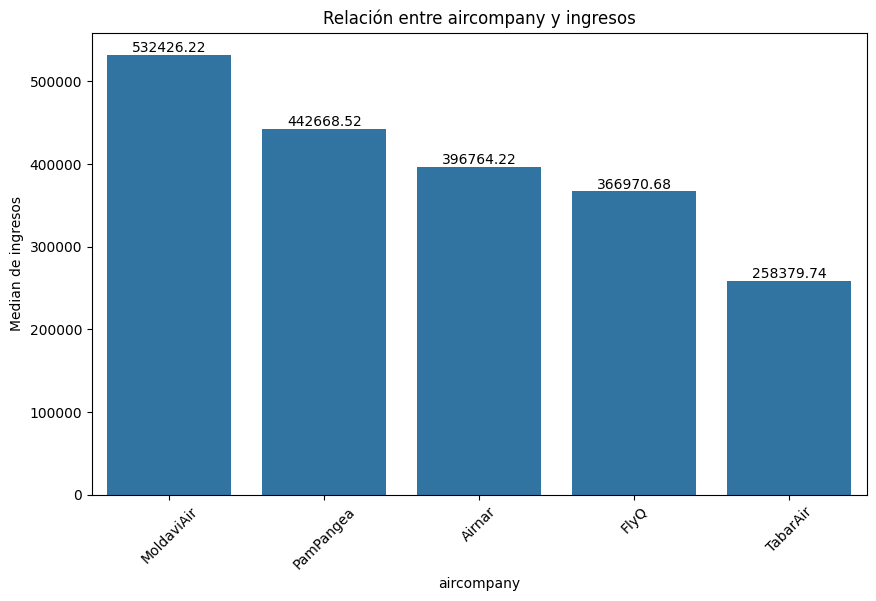

In [128]:
#Comparo la mediana de "ingresos" para cada valor de "aircompany"
viz.plot_categorical_numerical_relationship(df_viajes_jun,categorical_col="aircompany",numerical_col="ingresos", show_values=True, measure="median")

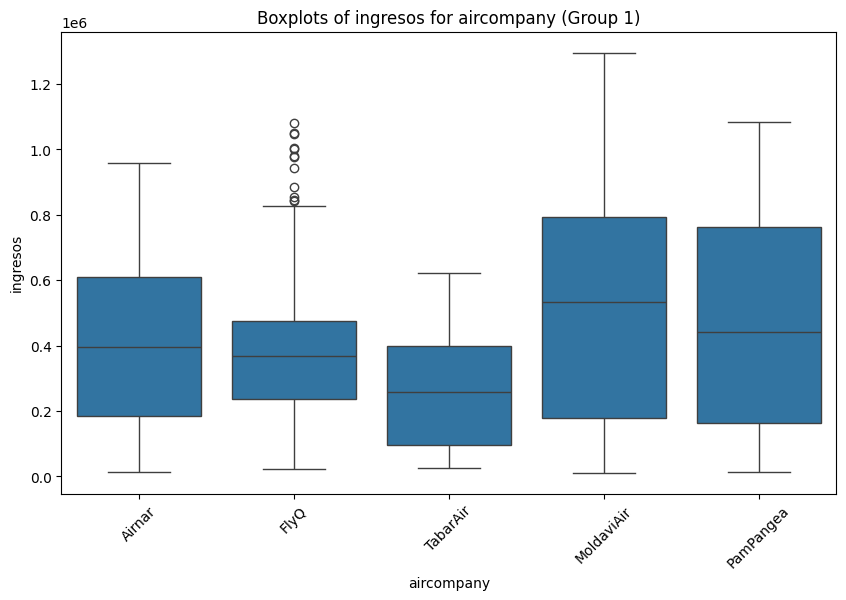

In [129]:
#Comparo los diagramas de caja para cada valor de "aircompany"
viz.plot_grouped_boxplots(df_viajes_jun,cat_col="aircompany", num_col="ingresos", group_size=5)

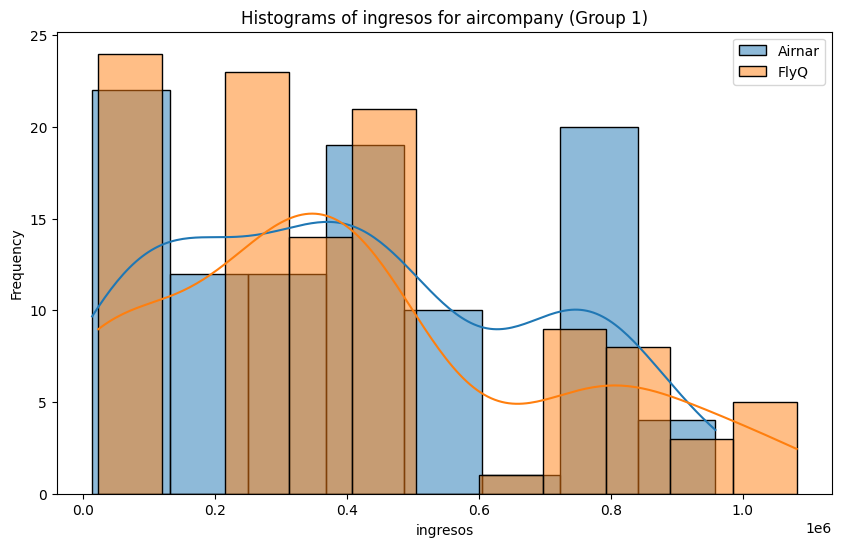

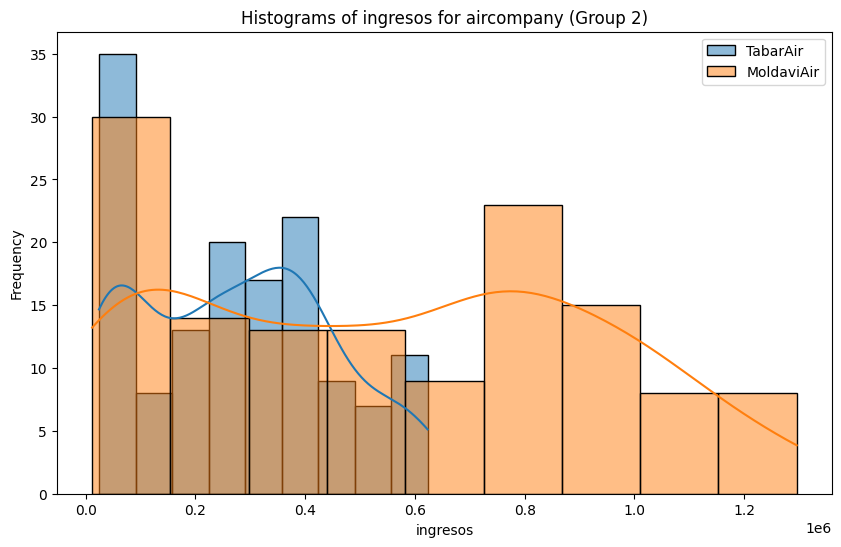

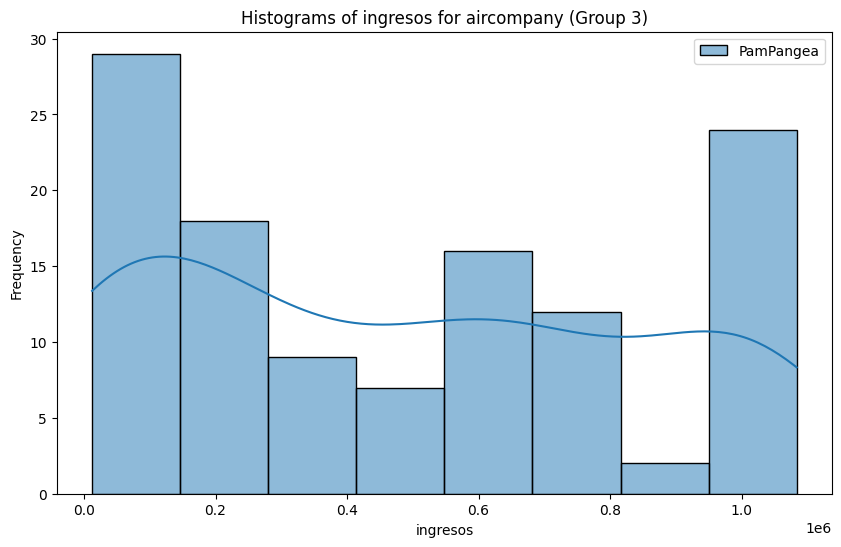

In [130]:
#Comparo los histogramas para cada valor de "aircompany"
viz.plot_grouped_histograms(df_viajes_jun, cat_col="aircompany", num_col="ingresos",group_size=2)

El resultado llamativo es que, a pesar de que TabarAir es la compañia que mas viajes realiza, es la que menos ingresos tiene en mediana , tal y como se desprende de los cálculos numéricos y gráficos previos donde la mediana y los cuartiles de TabarAir son los menores en el conjunto de todas las compañías aereas

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


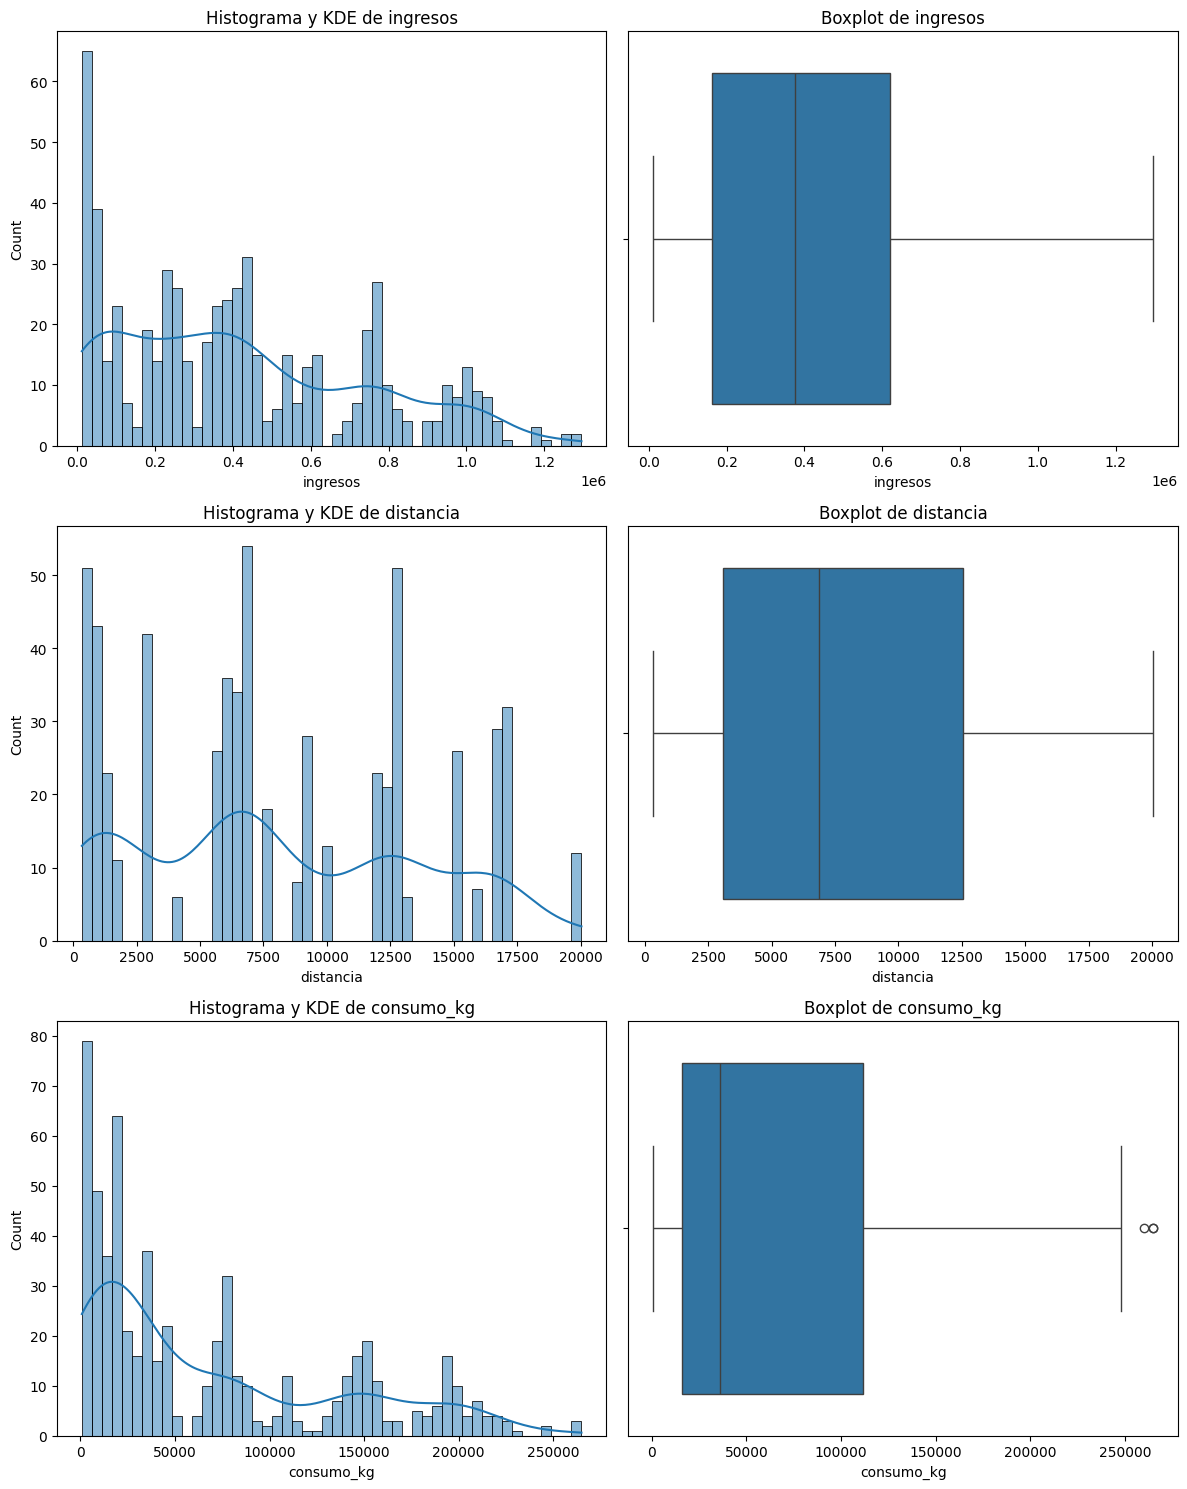

In [87]:
#Visualizo el histograma, la funcion de distribución y diagrama de caja de "ingresos", "distancia" y "consumo_kg" para tenerlo de referencia
viz.plot_combined_graphs(df_viajes_jun,columns=["ingresos","distancia","consumo_kg" ],whisker_width=1.5, bins=50)

In [88]:
#Calculo la matriz de correlacion
corr_matrix = df_viajes_jun[["ingresos", "distancia", "consumo_kg"]].corr()
corr_matrix

,ingresos,distancia,consumo_kg
ingresos,1.000000,0.928833,0.944875
distancia,0.928833,1.000000,0.762341
consumo_kg,0.944875,0.762341,1.000000


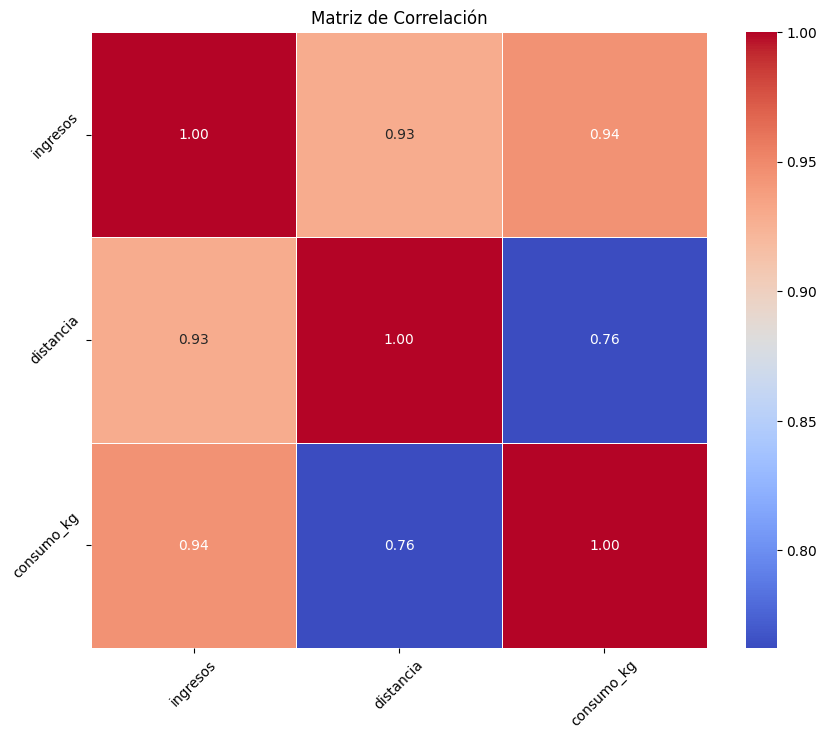

In [89]:
#Visualizo el Heatmap
plt.figure(figsize=(10, 8))  #Para ajustar el tamaño de las gráficas
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar=True, square=True, linewidths=.5) #El cmap es el rango de colores usado para representar "el calor"

plt.title('Matriz de Correlación')
plt.xticks(rotation=45)  #Rota las etiquetas de las x si es necesario
plt.yticks(rotation=45)  #Rota las etiquetas de las y si es necesario

plt.show()

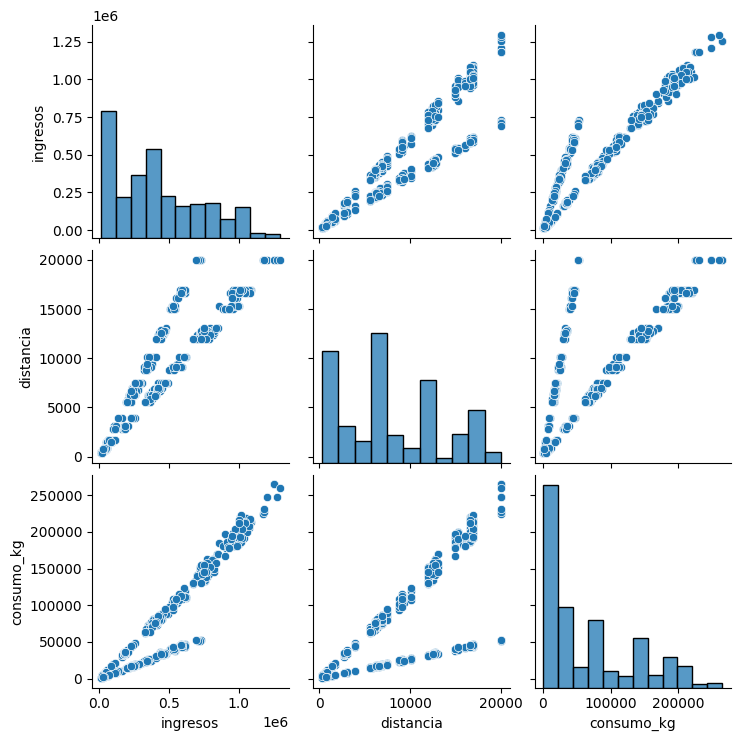

In [90]:
#Visualizo el Pairplot
df_viajes_jun_filtrado = df_viajes_jun[["ingresos", "distancia", "consumo_kg"]]
sns.pairplot(df_viajes_jun_filtrado)
plt.show()

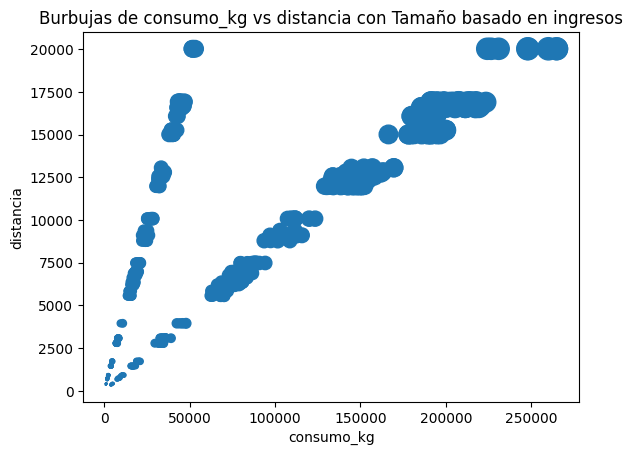

In [91]:
#Visualizo el gráfico de burbujas
viz.bubble_plot(df_viajes_jun,col_x="consumo_kg", col_y="distancia", col_size="ingresos", scale = 5000)

Las variables "distancia" y "consumo_kg" tienen una alta correlación positiva con "ingresos".  De los gráficos anteriores se observa:
1. En la comparación con "ingresos" con "distancia", y con "consumo_kg", hay dos tendencias lineales crecientes y una de éstas es la más eficiente por tener una mayor pendiente (esto significa mayores ingresos con menor incremento de distancia/consumo_kg)
2. El gráfico de burbujas es consistente con la observación 1. al aumentar las variables aumenta el tamaño de las burbujas (los ingresos)

Una continuación del análisis iría por el estudio de estas variables para cada valor de "aircompany" e incluso para cada valor de "avion"

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

Observando el histograma para la variable "distancia" establezco cuatro categorias:
1. Corta distancia (C): rango entre 0 y 5000
2. Media distancia (M): rango entre 5000 y 10000
3. Larga distancia (L): rango entre 10000 y 15000
4. Muy Larga distancia (ML): rango superior a 15000

In [132]:
#Creo la funcion para clasificar el vuelo
def clasificador_categoria(distancia):

    if distancia <= 5000:
        categoria = "Corta distancia (C)"
        return categoria

    elif distancia <= 10000:
        categoria = "Media distancia (M)"
        return categoria

    elif distancia <= 15000:
        categoria = "Larga distancia (L)"
        return categoria
    
    else:
        categoria  = "Muy Larga distancia (ML)"
        return categoria


In [133]:
#Creo una columna nueva con la clasificacion del vuelo
df_viajes_jun["cat_vuelo"] = df_viajes_jun["distancia"].apply(clasificador_categoria)
df_viajes_jun.head(10)

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23,Corta distancia (C)
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23,Larga distancia (L)
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23,Media distancia (M)
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23,Media distancia (M)
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23,Media distancia (M)
5,MoldaviAir,Cádiz,Melbourne,20029,Boeing 737,True,53148.153240,1721,728045.68,Mol_CaMe_10737,Jun23,Muy Larga distancia (ML)
6,MoldaviAir,París,Londres,344,Airbus A320,False,915.246400,44,13805.52,Mol_PaLo_11320,Jun23,Corta distancia (C)
7,PamPangea,París,Melbourne,16925,Airbus A380,True,217722.658400,1328,1056735.47,Pam_PaMe_11380,Jun23,Muy Larga distancia (ML)
8,PamPangea,Nueva York,Bali,16589,Boeing 737,True,45277.618464,1459,600836.96,Pam_NuBa_10737,Jun23,Muy Larga distancia (ML)
9,Airnar,Ginebra,Cádiz,1725,Airbus A380,False,20339.820000,135,110108.07,Air_GiCa_11380,Jun23,Corta distancia (C)


In [134]:
#Realizo la division de DataFrames para cada valor de la columna directora
col_directora = "cat_vuelo"
col_1 = "ingresos"
col_2 = "consumo_kg"

diccionario_multivariante = {}

for valor in df_viajes_jun[col_directora].unique():
    diccionario_multivariante[valor] = df_viajes_jun.loc[df_viajes_jun[col_directora] == valor, [col_1,col_2]]

Valor de <cat_vuelo>: Corta distancia (C)
            ingresos  consumo_kg
ingresos    1.000000    0.922723
consumo_kg  0.922723    1.000000 



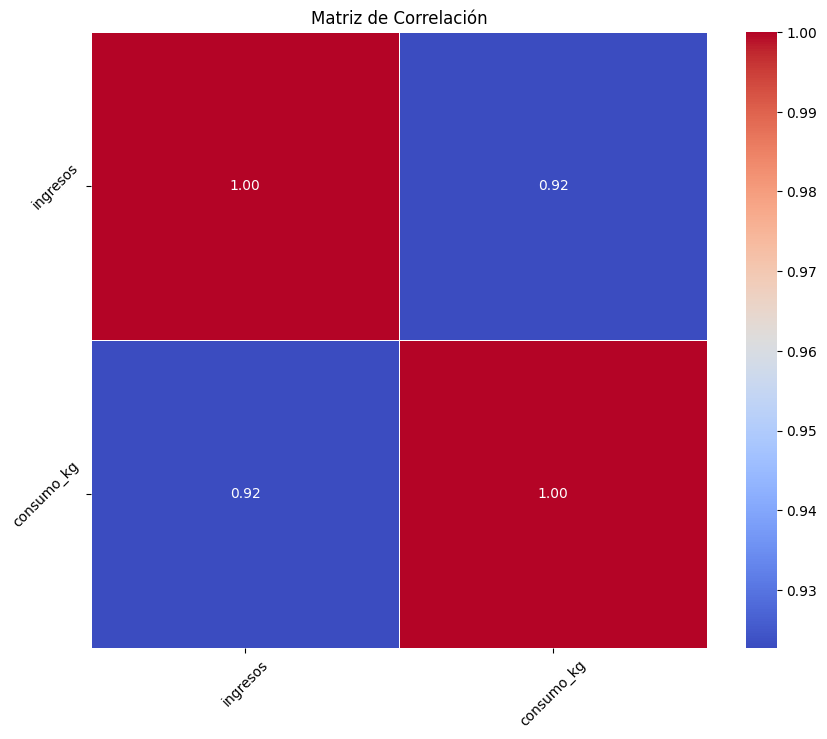

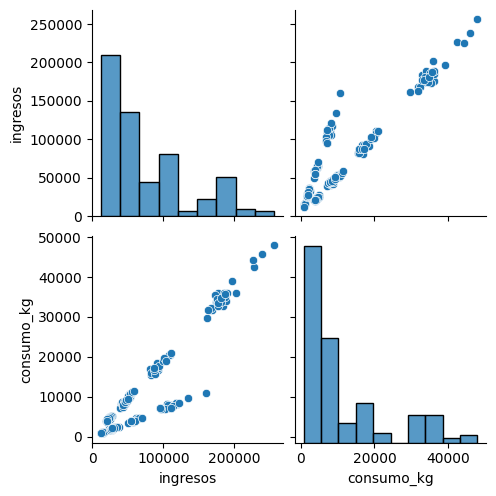

Valor de <cat_vuelo>: Larga distancia (L)
            ingresos  consumo_kg
ingresos    1.000000    0.981249
consumo_kg  0.981249    1.000000 



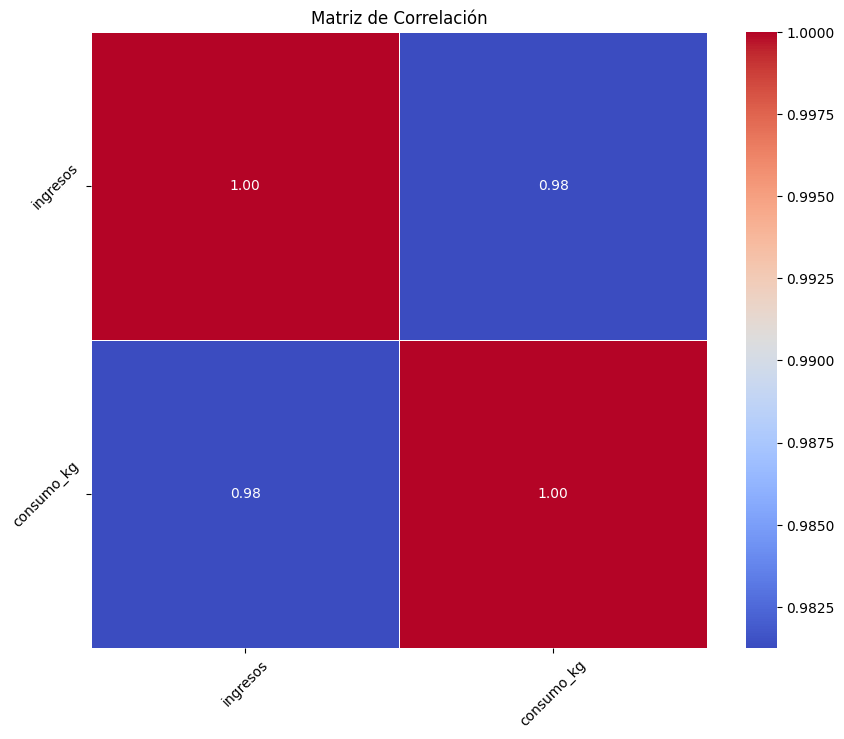

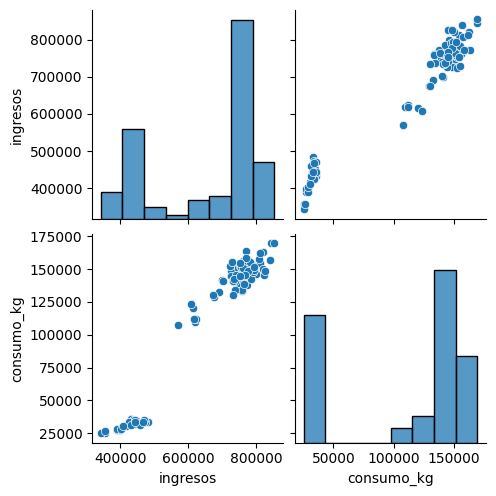

Valor de <cat_vuelo>: Media distancia (M)
            ingresos  consumo_kg
ingresos    1.000000    0.934418
consumo_kg  0.934418    1.000000 



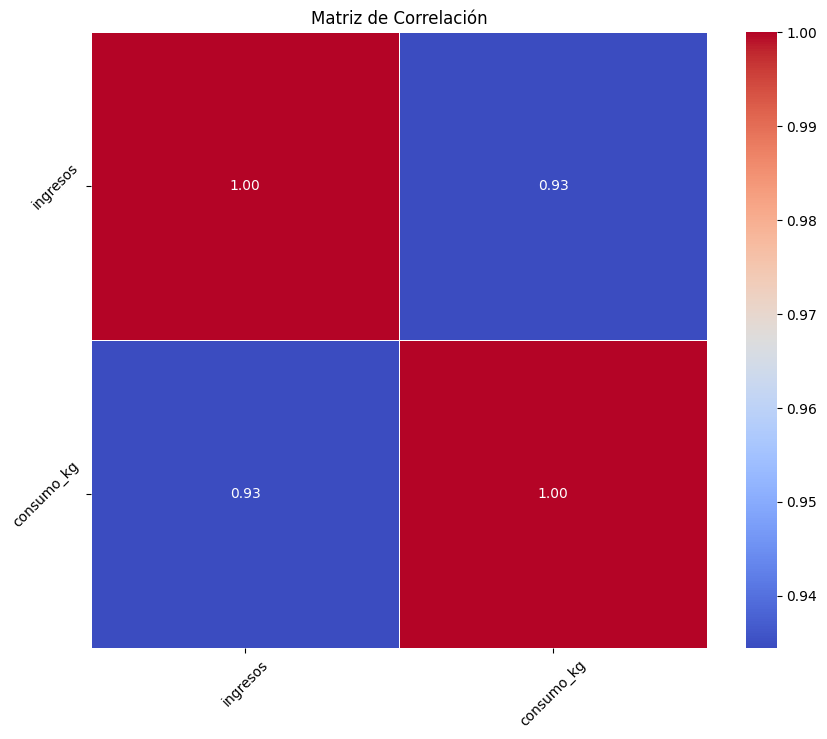

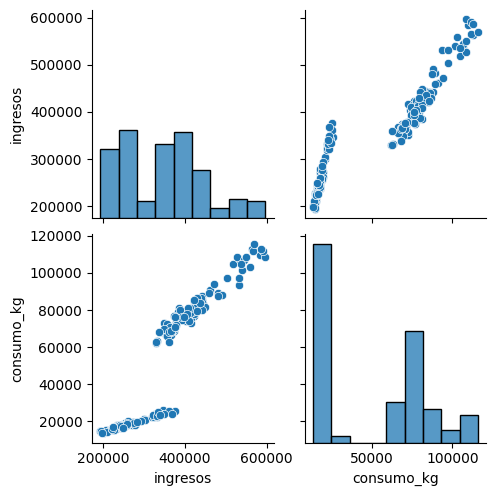

Valor de <cat_vuelo>: Muy Larga distancia (ML)
            ingresos  consumo_kg
ingresos    1.000000    0.974939
consumo_kg  0.974939    1.000000 



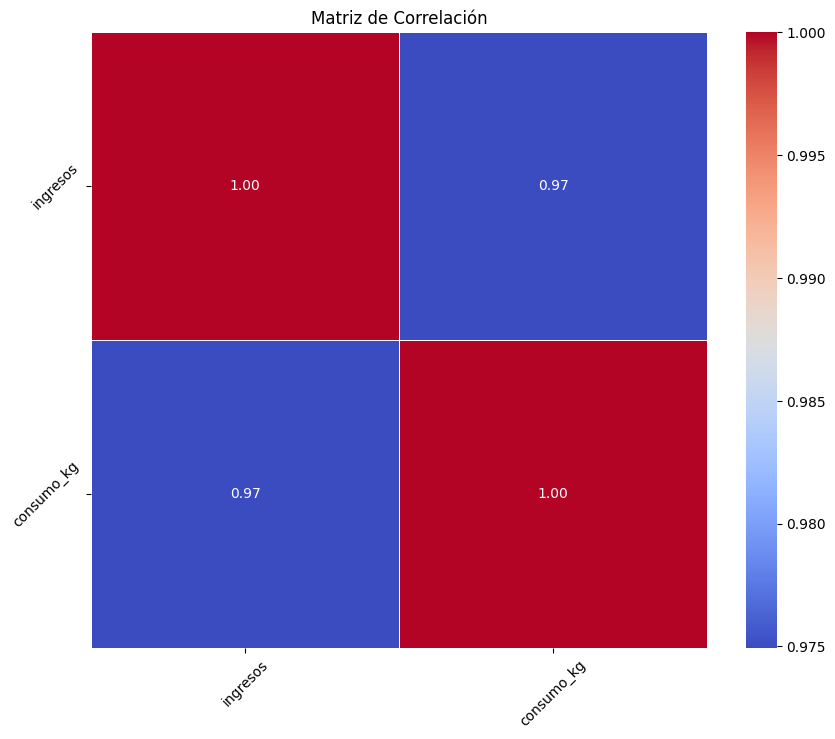

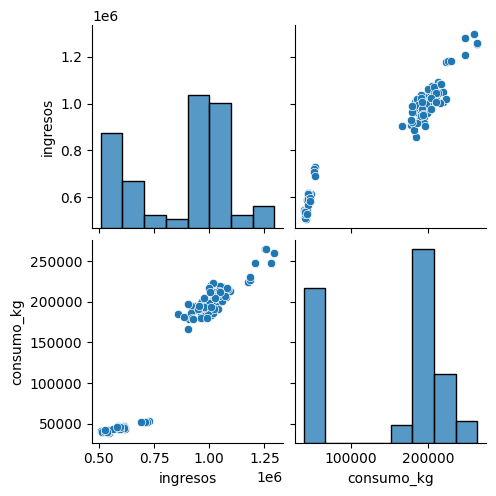

In [135]:
#Realizo el analisis bivariante para cada valor de la columna directora
for valor, df_datos in diccionario_multivariante.items():
    print(f"Valor de <{col_directora}>:", valor)
    
    #Calculo la matriz de correlacion
    corr_matrix = df_datos[["ingresos", "consumo_kg"]].corr()
    print(corr_matrix,"\n")

    #Visualizo el Heatmap
    plt.figure(figsize=(10, 8))  #Para ajustar el tamaño de las gráficas
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
                cbar=True, square=True, linewidths=.5) #El cmap es el rango de colores usado para representar "el calor"

    plt.title('Matriz de Correlación')
    plt.xticks(rotation=45)  #Rota las etiquetas de las x si es necesario
    plt.yticks(rotation=45)  #Rota las etiquetas de las y si es necesario

    plt.show()

    #Visualizo el Pairplot
    df_datos_filtrado = df_datos[["ingresos", "consumo_kg"]]
    sns.pairplot(df_datos_filtrado)
    plt.show()
        

En todas las categorias de vuelo se observan dos zonas diferenciadas, hay un salto en los valores de la variable "consumo_kg" que invita a investigar mas sobre ello teniendo en cuenta otras variables del dataset. Al igual que en el apartado anterior, una continuación del análisis iría por el estudio de estas variables para cada valor de "aircompany" e incluso para cada valor de "avion"

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.